#Entrega 11 - Obtención de insights a partir de visualizaciones

Un notebook (Colab o Jupyter) que debe contener:
* 1) Abstracto con motivación y audiencia: Descripción de alto nivel de lo que motiva a analizar los datos elegidos y que audiencia  se podrá beneficiar de este análisis

* 2) Preguntas/hipótesis que queremos responder: Lista de preguntas que se busca responder mediante el análisis de datos. Bloques de código donde se importan los datos desde una API o base de datos pública y los guarda en un archivo local csv o json. El estudiante puede luego de descargar los datos, comentar este bloque de código

* 3) Análisis exploratorio de datos (EDA): Análisis descriptivo de los datos mediante visualizaciones y herramientas estadísticas

Una presentación (PDF; PowerPoint o Google Slides) que debe contener:
* 1) Abstracto con motivación y audiencia: Descripción de alto nivel de lo que motiva a analizar los datos elegidos y que audiencia  se podrá beneficiar de este análisis.

* 2) Resumen de metadata: resumen de los datos a ser analizados es decir, número de filas/columnas, tipos de variables, etc.

* 3) Preguntas hipótesis que queremos responder: Lista de preguntas que se busca responder mediante el análisis de datos.

* 4) Visualizaciones ejecutivas que responden nuestras preguntas: utilización de gráficos que responden las preguntas de interés de nuestro proyecto.

* 5) Insights: resumen de hallazgos del proyecto. Aquí consolidamos las respuestas a las preguntas/hipótesis que fuimos contestando con las visualizaciones




#1) Abstracto con motivación y audiencia:

El deporte no es ajeno al contexto de la tecnología por lo tanto para realizar analisis, mejoras de los rendimientos el uso de datos es una gran herramienta. El deporte genera una gran cantidad de datos gracias al video, a las herramientas de scanner, etc.

En este entorno, continuamos con el trabajo de conexión a APIs que nos suministren datos, en este caso y como en las anteriores entregas se realiza la conexión con los resultados deportivos de la liga de fútbol argentino hasta la fecha 12/7/2023.

Por eso este proyecto puede generar un inicio para alguien que esta iniciando en proyectos de Data Science e intentar recopilar datos de las diferentes listas que presenta la API The Sports DB



##a) Conexión con API The Sports DB

Utilizamos la API The Sports DB para poder obtener un Dataset con los resultados deportivos de los partidos disputados durante el 2023 correspondientes a la Liga Argentina de Fútbol.

Para ello primero debemos saber como se presentan los datos en esta API, en principio se debe:

1. Conocer sobre los diferentes deportes con los cuales cuenta la API
2. Filtrar por las ligas que corresponde al fútbol ("Soccer")
3. Filtrar por las temporadas para poder obtener el id League que le corresponde a la Primera División Argentina de Fútbol.
4. Realizar el proceso EDA sobre el DS obtenido


Importación de Librerias

In [184]:
import requests
import time
import pandas as pd
import json
import numpy as np

###Conexión con URL API

In [185]:
url= 'https://www.thesportsdb.com/api/v1/json/3/all_countries.php'#Creo variable de URL
df = requests.get(url) #Instrucción requests para peticionar conexión a la url de la api
print(df)

<Response [200]>


In [186]:
print(len(df.text))
df.text

6454


'{"countries":[{"name_en":"Andorra"},{"name_en":"United Arab Emirates"},{"name_en":"Afghanistan"},{"name_en":"Antigua and Barbuda"},{"name_en":"Anguilla"},{"name_en":"Albania"},{"name_en":"Armenia"},{"name_en":"Angola"},{"name_en":"Antarctica"},{"name_en":"Argentina"},{"name_en":"American Samoa"},{"name_en":"Austria"},{"name_en":"Australia"},{"name_en":"Aruba"},{"name_en":"Åland Islands"},{"name_en":"Azerbaijan"},{"name_en":"Bosnia and Herzegovina"},{"name_en":"Barbados"},{"name_en":"Bangladesh"},{"name_en":"Belgium"},{"name_en":"Burkina Faso"},{"name_en":"Bulgaria"},{"name_en":"Bahrain"},{"name_en":"Burundi"},{"name_en":"Benin"},{"name_en":"Saint Barthélemy"},{"name_en":"Bermuda"},{"name_en":"Brunei Darussalam"},{"name_en":"Bolivia"},{"name_en":"Caribbean Netherlands "},{"name_en":"Brazil"},{"name_en":"Bahamas"},{"name_en":"Bhutan"},{"name_en":"Bouvet Island"},{"name_en":"Botswana"},{"name_en":"Belarus"},{"name_en":"Belize"},{"name_en":"Canada"},{"name_en":"Cocos (Keeling) Islands"},{

In [187]:
texto=df.text
json.loads(texto)

{'countries': [{'name_en': 'Andorra'},
  {'name_en': 'United Arab Emirates'},
  {'name_en': 'Afghanistan'},
  {'name_en': 'Antigua and Barbuda'},
  {'name_en': 'Anguilla'},
  {'name_en': 'Albania'},
  {'name_en': 'Armenia'},
  {'name_en': 'Angola'},
  {'name_en': 'Antarctica'},
  {'name_en': 'Argentina'},
  {'name_en': 'American Samoa'},
  {'name_en': 'Austria'},
  {'name_en': 'Australia'},
  {'name_en': 'Aruba'},
  {'name_en': 'Åland Islands'},
  {'name_en': 'Azerbaijan'},
  {'name_en': 'Bosnia and Herzegovina'},
  {'name_en': 'Barbados'},
  {'name_en': 'Bangladesh'},
  {'name_en': 'Belgium'},
  {'name_en': 'Burkina Faso'},
  {'name_en': 'Bulgaria'},
  {'name_en': 'Bahrain'},
  {'name_en': 'Burundi'},
  {'name_en': 'Benin'},
  {'name_en': 'Saint Barthélemy'},
  {'name_en': 'Bermuda'},
  {'name_en': 'Brunei Darussalam'},
  {'name_en': 'Bolivia'},
  {'name_en': 'Caribbean Netherlands '},
  {'name_en': 'Brazil'},
  {'name_en': 'Bahamas'},
  {'name_en': 'Bhutan'},
  {'name_en': 'Bouvet Is

A continuación obtuvimos todos los países de los cuales la API contiene ligas, temporadas, ligas. Además de fútbol también posee datos sobre basquet, fútbol americano, etc.

Posteriormente, se realiza la conexión con la API para poder obtener las ligas que corresponden a Argentina, para eso primero necesito ver como se filtran datos para Argentina.

In [188]:
jsondata=json.loads(texto)
paises=pd.DataFrame.from_dict(jsondata['countries'])#Convierto el diccionario "countries" en una DF.
paises.head(100)

,name_en
0,Andorra
1,United Arab Emirates
2,Afghanistan
3,Antigua and Barbuda
4,Anguilla
5,Albania
6,Armenia
7,Angola
8,Antarctica
9,Argentina


In [189]:
arg=paises[paises['name_en'].str.contains('Argenti',case=False,na=False,regex=True)]
arg

,name_en
9,Argentina


###Conexión API con ligas correspondientes a Argentina

In [190]:
#Conecto API con todas las ligas que poseen dentro de su BD para "Argentina"
url= 'https://www.thesportsdb.com/api/v1/json/3/search_all_leagues.php?c=Argentina'
df = requests.get(url)
print(df)

<Response [200]>


In [191]:
print(len(df.text))
df.text

29275


'{"countries":[{"idLeague":"4616","idSoccerXML":null,"idAPIfootball":"4972","strSport":"Soccer","strLeague":"Argentinian Primera B Nacional","strLeagueAlternate":"Nacional B, Primera Nacional","intDivision":"2","idCup":"0","strCurrentSeason":"2023","intFormedYear":"1986","dateFirstEvent":"2019-08-16","strGender":"Male","strCountry":"Argentina","strWebsite":"www.afa.com.ar\\/499\\/pages\\/estadisticas-primera-b-nacional","strFacebook":"","strInstagram":"","strTwitter":"","strYoutube":"","strRSS":"","strDescriptionEN":"Primera B Nacional (usually called simply Nacional B, in English \\"National B Division\\", and Primera Nacional since the 2019–20 season) is the second division of the Argentine football league system. The competition is made up of 32 teams, divided into two zones.\\r\\n\\r\\nIt is played by teams from all over the country. Clubs from Buenos Aires surroundings, as well as some from Santa Fe Province, are promoted from or relegated to the Primera B Metropolitana (\\"Metrop

In [192]:
texto=df.text
json.loads(texto)

{'countries': [{'idLeague': '4616',
   'idSoccerXML': None,
   'idAPIfootball': '4972',
   'strSport': 'Soccer',
   'strLeague': 'Argentinian Primera B Nacional',
   'strLeagueAlternate': 'Nacional B, Primera Nacional',
   'intDivision': '2',
   'idCup': '0',
   'strCurrentSeason': '2023',
   'intFormedYear': '1986',
   'dateFirstEvent': '2019-08-16',
   'strGender': 'Male',
   'strCountry': 'Argentina',
   'strWebsite': 'www.afa.com.ar/499/pages/estadisticas-primera-b-nacional',
   'strFacebook': '',
   'strInstagram': '',
   'strTwitter': '',
   'strYoutube': '',
   'strRSS': '',
   'strDescriptionEN': 'Primera B Nacional (usually called simply Nacional B, in English "National B Division", and Primera Nacional since the 2019–20 season) is the second division of the Argentine football league system. The competition is made up of 32 teams, divided into two zones.\r\n\r\nIt is played by teams from all over the country. Clubs from Buenos Aires surroundings, as well as some from Santa Fe 

In [193]:
jsondata=json.loads(texto)
df2=pd.DataFrame.from_dict(jsondata['countries'])#Convierto el diccionario "countries" en una DF.
df2.head(100)

,idLeague,idSoccerXML,idAPIfootball,strSport,strLeague,strLeagueAlternate,intDivision,idCup,strCurrentSeason,intFormedYear,...,strFanart3,strFanart4,strBanner,strBadge,strLogo,strPoster,strTrophy,strNaming,strComplete,strLocked
0,4616,None,4972,Soccer,Argentinian Primera B Nacional,"Nacional B, Primera Nacional",2,0,2023,1986,...,None,None,None,https://www.thesportsdb.com/images/media/leagu...,https://www.thesportsdb.com/images/media/leagu...,None,None,{strHomeTeam} vs {strAwayTeam},None,unlocked
1,5165,None,1,Rugby,URBA Top 13,Top 13,1,0,2023,1899,...,None,None,None,https://www.thesportsdb.com/images/media/leagu...,https://www.thesportsdb.com/images/media/leagu...,None,None,{strHomeTeam} vs {strAwayTeam},None,unlocked
2,5169,None,41,Rugby,Super Liga Americana,American Rugby Superleague,1,0,2023,2020,...,None,None,None,https://www.thesportsdb.com/images/media/leagu...,https://www.thesportsdb.com/images/media/leagu...,None,None,{strHomeTeam} vs {strAwayTeam},None,unlocked
3,4406,None,4872,Soccer,Argentinian Primera Division,Liga Profesional de Fútbol,1,0,2023,1891,...,None,None,https://www.thesportsdb.com/images/media/leagu...,https://www.thesportsdb.com/images/media/leagu...,https://www.thesportsdb.com/images/media/leagu...,https://www.thesportsdb.com/images/media/leagu...,https://www.thesportsdb.com/images/media/leagu...,{strHomeTeam} vs {strAwayTeam},None,unlocked
4,5215,None,4116,Soccer,Argentina Primera B Metropolitana,,3,0,2022-2023,1899,...,None,None,None,https://www.thesportsdb.com/images/media/leagu...,None,None,None,{strHomeTeam} vs {strAwayTeam},None,unlocked
5,4734,None,18,Basketball,Argentine LNB,Liga Nacional de Básquet,1,0,2022-2023,1985,...,https://www.thesportsdb.com/images/media/leagu...,https://www.thesportsdb.com/images/media/leagu...,https://www.thesportsdb.com/images/media/leagu...,https://www.thesportsdb.com/images/media/leagu...,https://www.thesportsdb.com/images/media/leagu...,https://www.thesportsdb.com/images/media/leagu...,https://www.thesportsdb.com/images/media/leagu...,{strHomeTeam} vs {strAwayTeam},yes,unlocked
6,4500,None,4930,Soccer,Copa Argentina,,99,1,2023,1969,...,None,None,None,https://www.thesportsdb.com/images/media/leagu...,https://www.thesportsdb.com/images/media/leagu...,None,None,{strHomeTeam} vs {strAwayTeam},None,unlocked


In [194]:
#Nuevo DF con filtro con solo ligas de Argentina que sean de Fútbol
futbol=df2[df2['strSport'].str.contains('Soccer',case=False,na=False,regex=True)]
futbol

,idLeague,idSoccerXML,idAPIfootball,strSport,strLeague,strLeagueAlternate,intDivision,idCup,strCurrentSeason,intFormedYear,...,strFanart3,strFanart4,strBanner,strBadge,strLogo,strPoster,strTrophy,strNaming,strComplete,strLocked
0,4616,None,4972,Soccer,Argentinian Primera B Nacional,"Nacional B, Primera Nacional",2,0,2023,1986,...,None,None,None,https://www.thesportsdb.com/images/media/leagu...,https://www.thesportsdb.com/images/media/leagu...,None,None,{strHomeTeam} vs {strAwayTeam},None,unlocked
3,4406,None,4872,Soccer,Argentinian Primera Division,Liga Profesional de Fútbol,1,0,2023,1891,...,None,None,https://www.thesportsdb.com/images/media/leagu...,https://www.thesportsdb.com/images/media/leagu...,https://www.thesportsdb.com/images/media/leagu...,https://www.thesportsdb.com/images/media/leagu...,https://www.thesportsdb.com/images/media/leagu...,{strHomeTeam} vs {strAwayTeam},None,unlocked
4,5215,None,4116,Soccer,Argentina Primera B Metropolitana,,3,0,2022-2023,1899,...,None,None,None,https://www.thesportsdb.com/images/media/leagu...,None,None,None,{strHomeTeam} vs {strAwayTeam},None,unlocked
6,4500,None,4930,Soccer,Copa Argentina,,99,1,2023,1969,...,None,None,None,https://www.thesportsdb.com/images/media/leagu...,https://www.thesportsdb.com/images/media/leagu...,None,None,{strHomeTeam} vs {strAwayTeam},None,unlocked


###Conexion API con eventos para la Liga Argentina

Ahora se realiza conexión con datos correspondientes a la "Argentinian Primera Division" habiendo obtenido el idLeague *4406* , para este caso vamos a verificar primero cuantas temporadas tiene esta BD de la liga.

Posteriormente veremos de esas ligas la temporada 2023 en particular.

In [195]:
#Conecto API con todas las liga de Futbol Argentina que posee el idLeague=4406
url= 'https://www.thesportsdb.com/api/v1/json/3/search_all_seasons.php?id=4406'
df = requests.get(url)
print(df)

<Response [200]>


In [196]:
print(len(df.text))
df.text

144


'{"seasons":[{"strSeason":"2015"},{"strSeason":"2019-2020"},{"strSeason":"2020"},{"strSeason":"2021"},{"strSeason":"2022"},{"strSeason":"2023"}]}'

In [197]:
texto=df.text
json.loads(texto)

{'seasons': [{'strSeason': '2015'},
  {'strSeason': '2019-2020'},
  {'strSeason': '2020'},
  {'strSeason': '2021'},
  {'strSeason': '2022'},
  {'strSeason': '2023'}]}

In [198]:
jsondata=json.loads(texto)
df2=pd.DataFrame.from_dict(jsondata['seasons'])#Convierto el diccionario "seasons" en una DF.
df2.head(100)

,strSeason
0,2015
1,2019-2020
2,2020
3,2021
4,2022
5,2023


Verificamos que las temporadas disponibles son 2015 y desde 2019 hasta 2023. Conectaremos con la temporada 2023, que es la actual temporada que se esta desarrollando.

Para conectar con los eventos de la esta temporada utilizaremos la API KEY que nos brindan desde la API teniendo una suscripción mensual.



In [199]:
#Conecto API con todas los eventos que me pueda proporcionar a nivel gratuito (100 partidos),
#a efectos de limpieza servira si luego conectamos con una API_KEY

api_key='60130162'
idLeague='4406'
temp='2023'

url= 'https://www.thesportsdb.com/api/v1/json/'+api_key+'/eventsseason.php?id='+idLeague+'&s='+temp
df = requests.get(url)
print(df)

<Response [200]>


In [200]:
print(len(df.text))
df.text

673748


'{"events":[{"idEvent":"1808179","idSoccerXML":null,"idAPIfootball":"971352","strEvent":"Rosario Central vs Argentinos Juniors","strEventAlternate":"Argentinos Juniors @ Rosario Central","strFilename":"Argentinian Primera Division 2023-01-26 Rosario Central vs Argentinos Juniors","strSport":"Soccer","idLeague":"4406","strLeague":"Argentinian Primera Division","strSeason":"2023","strDescriptionEN":null,"strHomeTeam":"Rosario Central","strAwayTeam":"Argentinos Juniors","intHomeScore":"1","intRound":"1","intAwayScore":"0","intSpectators":null,"strOfficial":"Y. Falcón","strTimestamp":"2023-01-26T22:15:00+00:00","dateEvent":"2023-01-26","dateEventLocal":null,"strTime":"22:15:00","strTimeLocal":null,"strTVStation":null,"idHomeTeam":"135172","idAwayTeam":"135151","intScore":null,"intScoreVotes":null,"strResult":null,"strVenue":"Estadio Gigante de Arroyito","strCountry":"Argentina","strCity":null,"strPoster":"","strSquare":"","strFanart":null,"strThumb":"https:\\/\\/www.thesportsdb.com\\/image

In [201]:
texto=df.text
json.loads(texto)

{'events': [{'idEvent': '1808179',
   'idSoccerXML': None,
   'idAPIfootball': '971352',
   'strEvent': 'Rosario Central vs Argentinos Juniors',
   'strEventAlternate': 'Argentinos Juniors @ Rosario Central',
   'strFilename': 'Argentinian Primera Division 2023-01-26 Rosario Central vs Argentinos Juniors',
   'strSport': 'Soccer',
   'idLeague': '4406',
   'strLeague': 'Argentinian Primera Division',
   'strSeason': '2023',
   'strDescriptionEN': None,
   'strHomeTeam': 'Rosario Central',
   'strAwayTeam': 'Argentinos Juniors',
   'intHomeScore': '1',
   'intRound': '1',
   'intAwayScore': '0',
   'intSpectators': None,
   'strOfficial': 'Y. Falcón',
   'strTimestamp': '2023-01-26T22:15:00+00:00',
   'dateEvent': '2023-01-26',
   'dateEventLocal': None,
   'strTime': '22:15:00',
   'strTimeLocal': None,
   'strTVStation': None,
   'idHomeTeam': '135172',
   'idAwayTeam': '135151',
   'intScore': None,
   'intScoreVotes': None,
   'strResult': None,
   'strVenue': 'Estadio Gigante de Ar

#2) Análisis exploratorio de datos (EDA)

In [202]:
jsondata=json.loads(texto)
liga_2023=pd.DataFrame.from_dict(jsondata['events'])#Convierto el diccionario "events" en una DF.
liga_2023.head()

,idEvent,idSoccerXML,idAPIfootball,strEvent,strEventAlternate,strFilename,strSport,idLeague,strLeague,strSeason,...,strThumb,strBanner,strMap,strTweet1,strTweet2,strTweet3,strVideo,strStatus,strPostponed,strLocked
0,1808179,None,971352,Rosario Central vs Argentinos Juniors,Argentinos Juniors @ Rosario Central,Argentinian Primera Division 2023-01-26 Rosari...,Soccer,4406,Argentinian Primera Division,2023,...,https://www.thesportsdb.com/images/media/event...,,None,None,None,None,None,Match Finished,no,unlocked
1,1808180,None,971353,Estudiantes de la Plata vs Tigre,Tigre @ Estudiantes de la Plata,Argentinian Primera Division 2023-01-27 Estudi...,Soccer,4406,Argentinian Primera Division,2023,...,https://www.thesportsdb.com/images/media/event...,,None,None,None,None,None,Match Finished,no,unlocked
2,1808181,None,971361,Talleres de Cordoba vs Independiente,Independiente @ Talleres de Cordoba,Argentinian Primera Division 2023-01-27 Taller...,Soccer,4406,Argentinian Primera Division,2023,...,https://www.thesportsdb.com/images/media/event...,,None,None,None,None,None,Match Finished,no,unlocked
3,1808182,None,971358,Defensa y Justicia vs Huracan,Huracan @ Defensa y Justicia,Argentinian Primera Division 2023-01-28 Defens...,Soccer,4406,Argentinian Primera Division,2023,...,https://www.thesportsdb.com/images/media/event...,,None,None,None,None,None,Match Finished,no,unlocked
4,1808183,None,971354,San Lorenzo vs Arsenal Sarandi,Arsenal Sarandi @ San Lorenzo,Argentinian Primera Division 2023-01-28 San Lo...,Soccer,4406,Argentinian Primera Division,2023,...,https://www.thesportsdb.com/images/media/event...,,None,None,None,None,None,Match Finished,no,unlocked


In [203]:
print(liga_2023.shape)

(574, 45)


In [204]:
liga_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   idEvent            574 non-null    object
 1   idSoccerXML        0 non-null      object
 2   idAPIfootball      574 non-null    object
 3   strEvent           574 non-null    object
 4   strEventAlternate  574 non-null    object
 5   strFilename        574 non-null    object
 6   strSport           574 non-null    object
 7   idLeague           574 non-null    object
 8   strLeague          574 non-null    object
 9   strSeason          574 non-null    object
 10  strDescriptionEN   162 non-null    object
 11  strHomeTeam        574 non-null    object
 12  strAwayTeam        574 non-null    object
 13  intHomeScore       356 non-null    object
 14  intRound           574 non-null    object
 15  intAwayScore       356 non-null    object
 16  intSpectators      0 non-null      object
 1

In [205]:
liga_2023.isna().sum()

idEvent                0
idSoccerXML          574
idAPIfootball          0
strEvent               0
strEventAlternate      0
strFilename            0
strSport               0
idLeague               0
strLeague              0
strSeason              0
strDescriptionEN     412
strHomeTeam            0
strAwayTeam            0
intHomeScore         218
intRound               0
intAwayScore         218
intSpectators        574
strOfficial            0
strTimestamp           0
dateEvent              0
dateEventLocal       412
strTime                0
strTimeLocal         412
strTVStation         574
idHomeTeam             0
idAwayTeam             0
intScore             574
intScoreVotes        574
strResult            412
strVenue               0
strCountry             0
strCity              412
strPoster              0
strSquare              0
strFanart            574
strThumb               0
strBanner              0
strMap               574
strTweet1            412
strTweet2            412


In [206]:
# Columnas con porcentaje de nulos
pd.set_option('display.max_rows', None)  # or 1000
serie=(liga_2023.isnull().sum()/liga_2023.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

intScoreVotes       100.000000
strFanart           100.000000
strTVStation        100.000000
idSoccerXML         100.000000
intSpectators       100.000000
strMap              100.000000
intScore            100.000000
strResult            71.777003
dateEventLocal       71.777003
strCity              71.777003
strTimeLocal         71.777003
strDescriptionEN     71.777003
strTweet1            71.777003
strTweet2            71.777003
strTweet3            71.777003
strVideo             71.777003
intAwayScore         37.979094
intHomeScore         37.979094
dtype: float64

<Axes: >

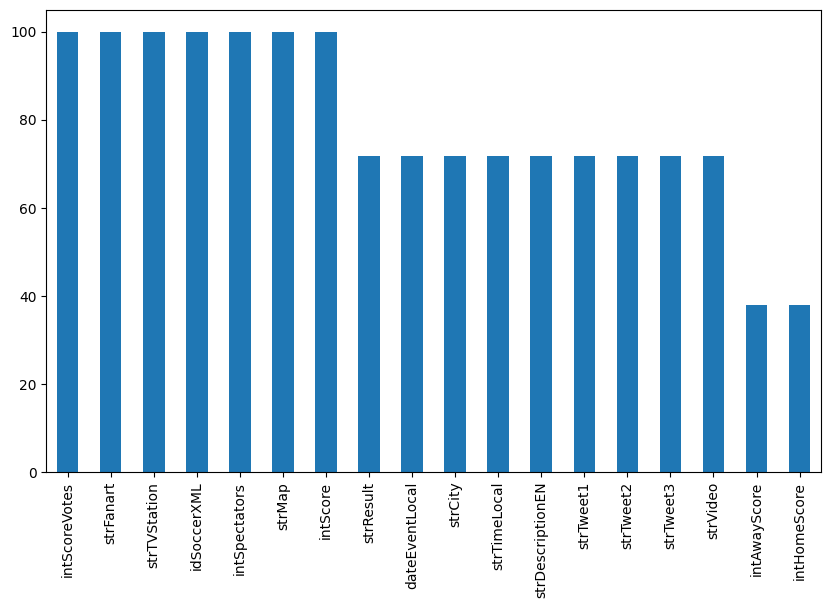

In [207]:
# Graficamente
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
serie.plot(kind='bar')

In [208]:
pip install missingno

<Axes: >

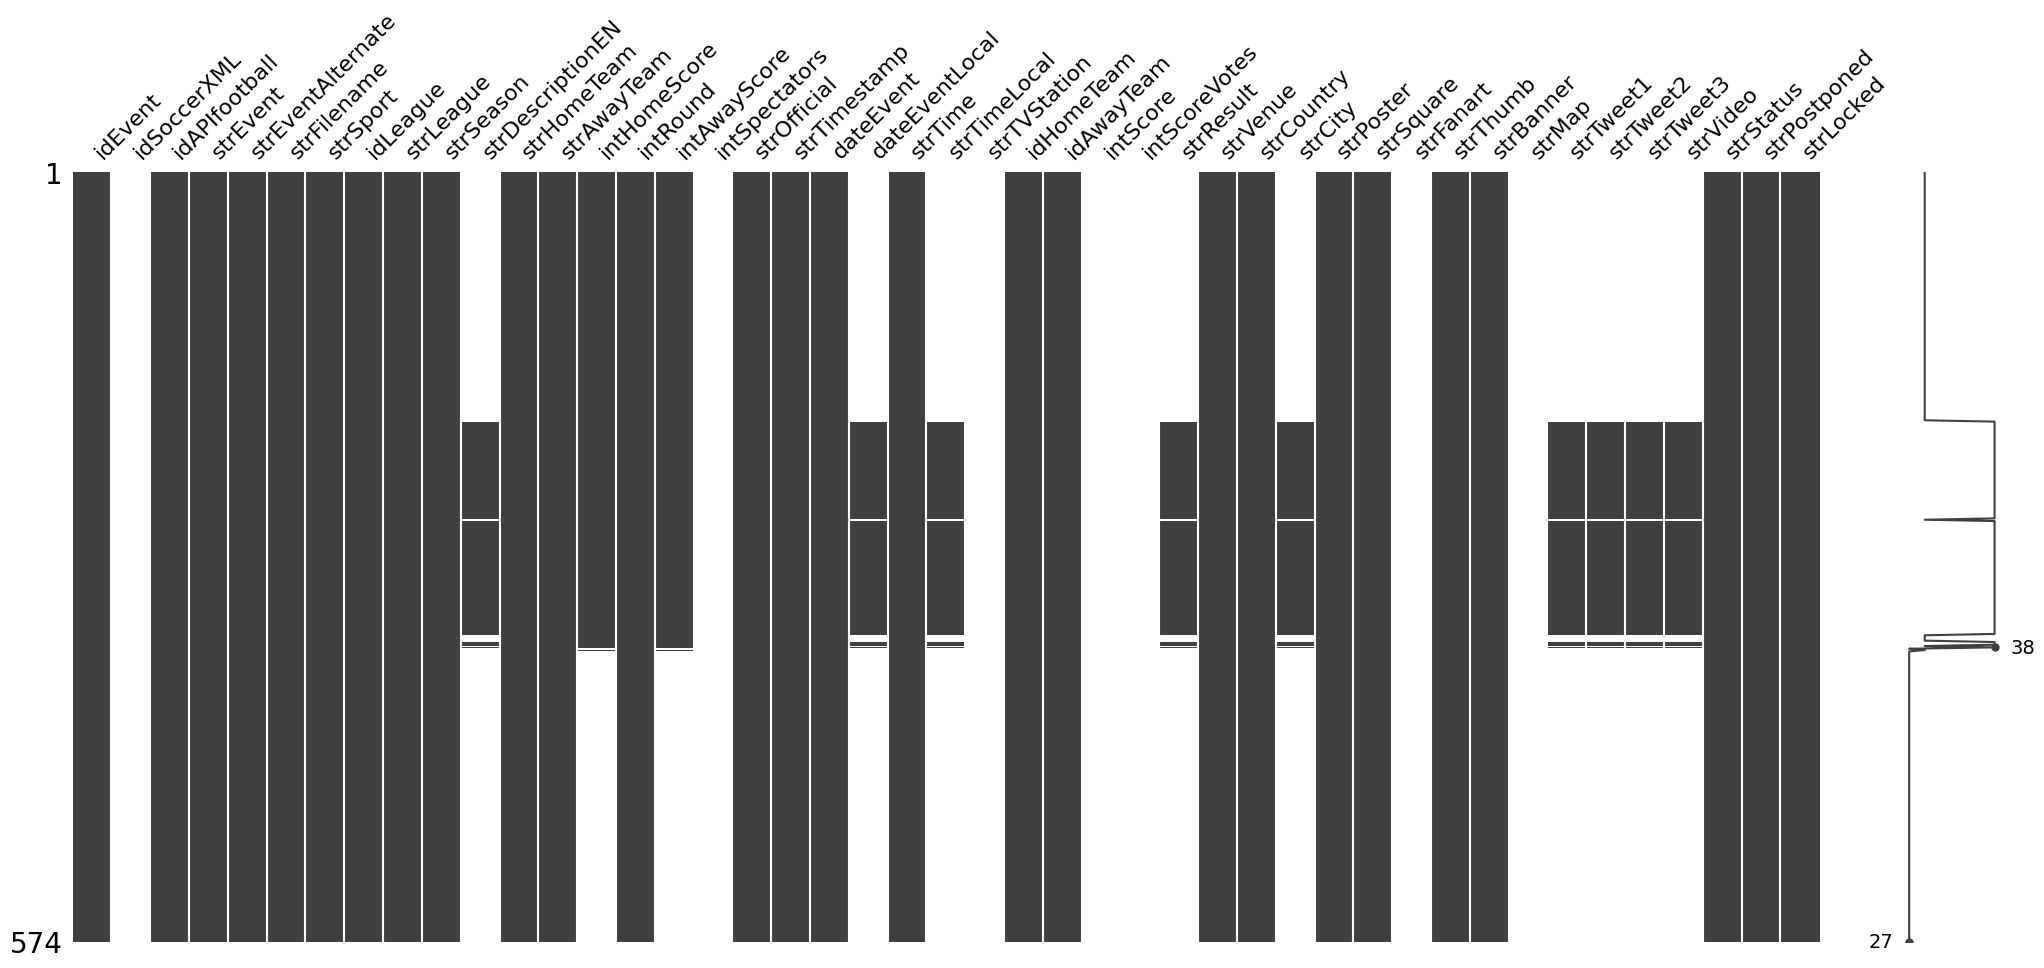

In [209]:
import missingno as msno
msno.matrix(liga_2023)

<Axes: >

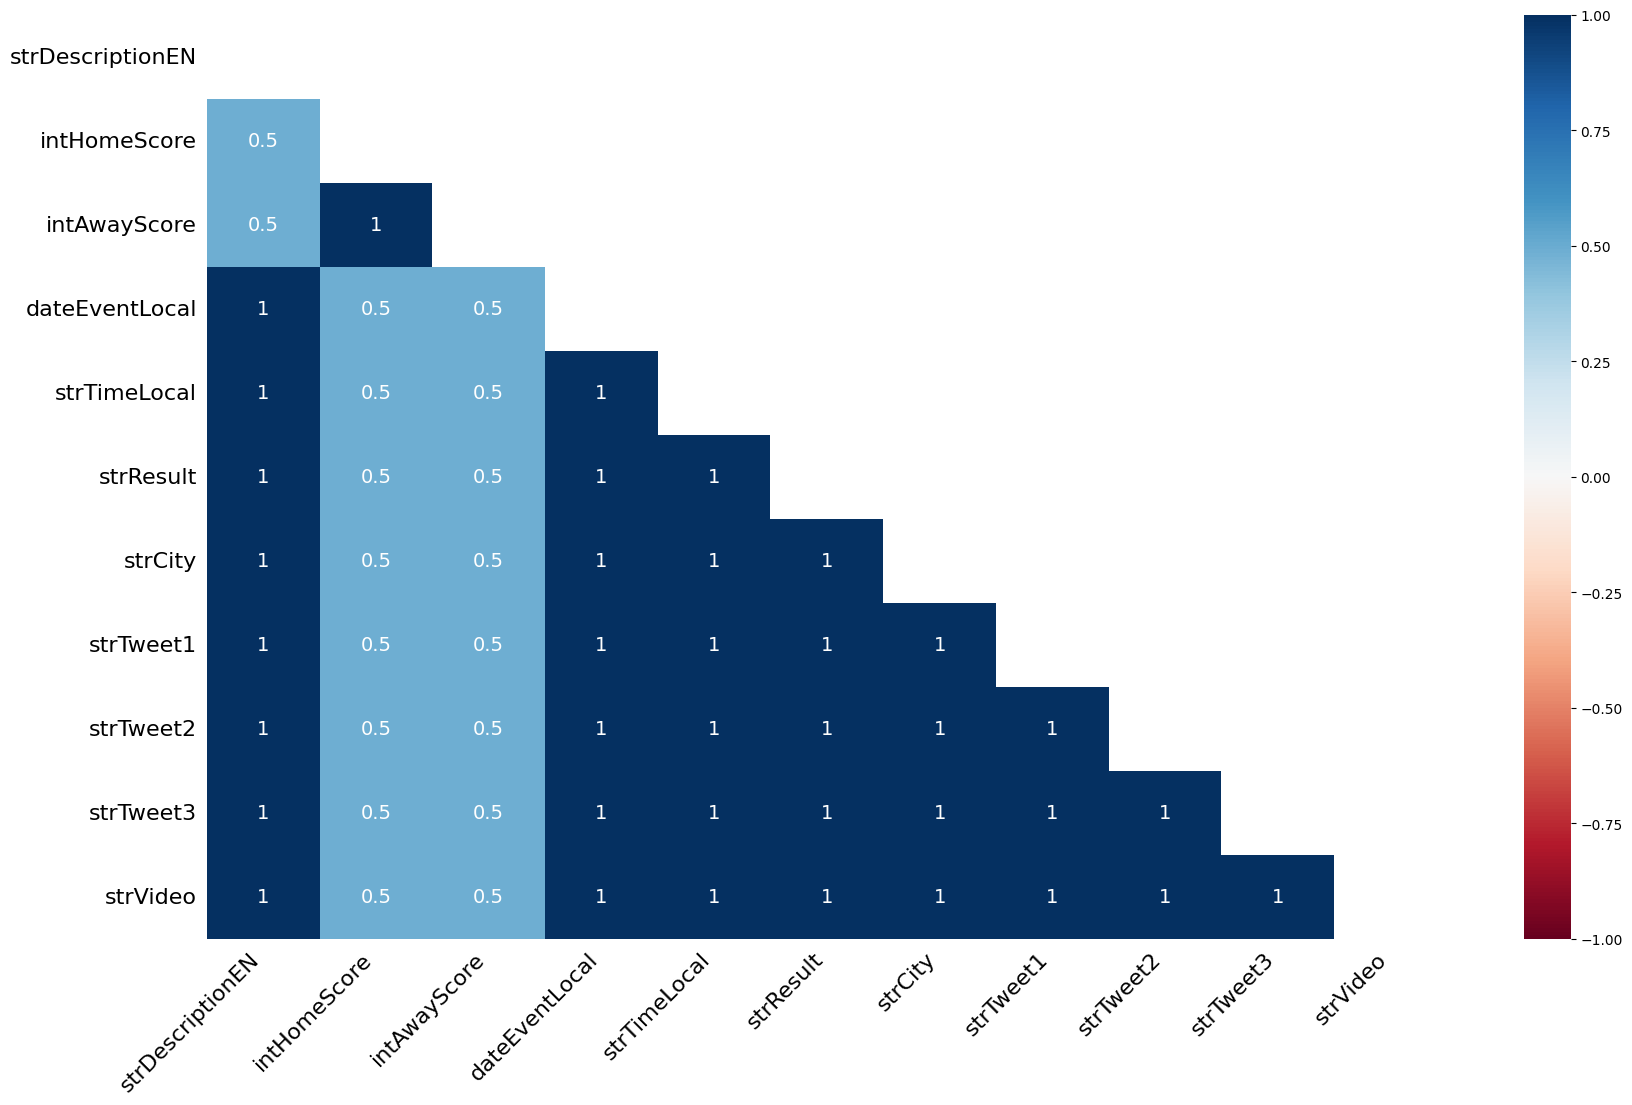

In [210]:
msno.heatmap(liga_2023)

<Axes: >

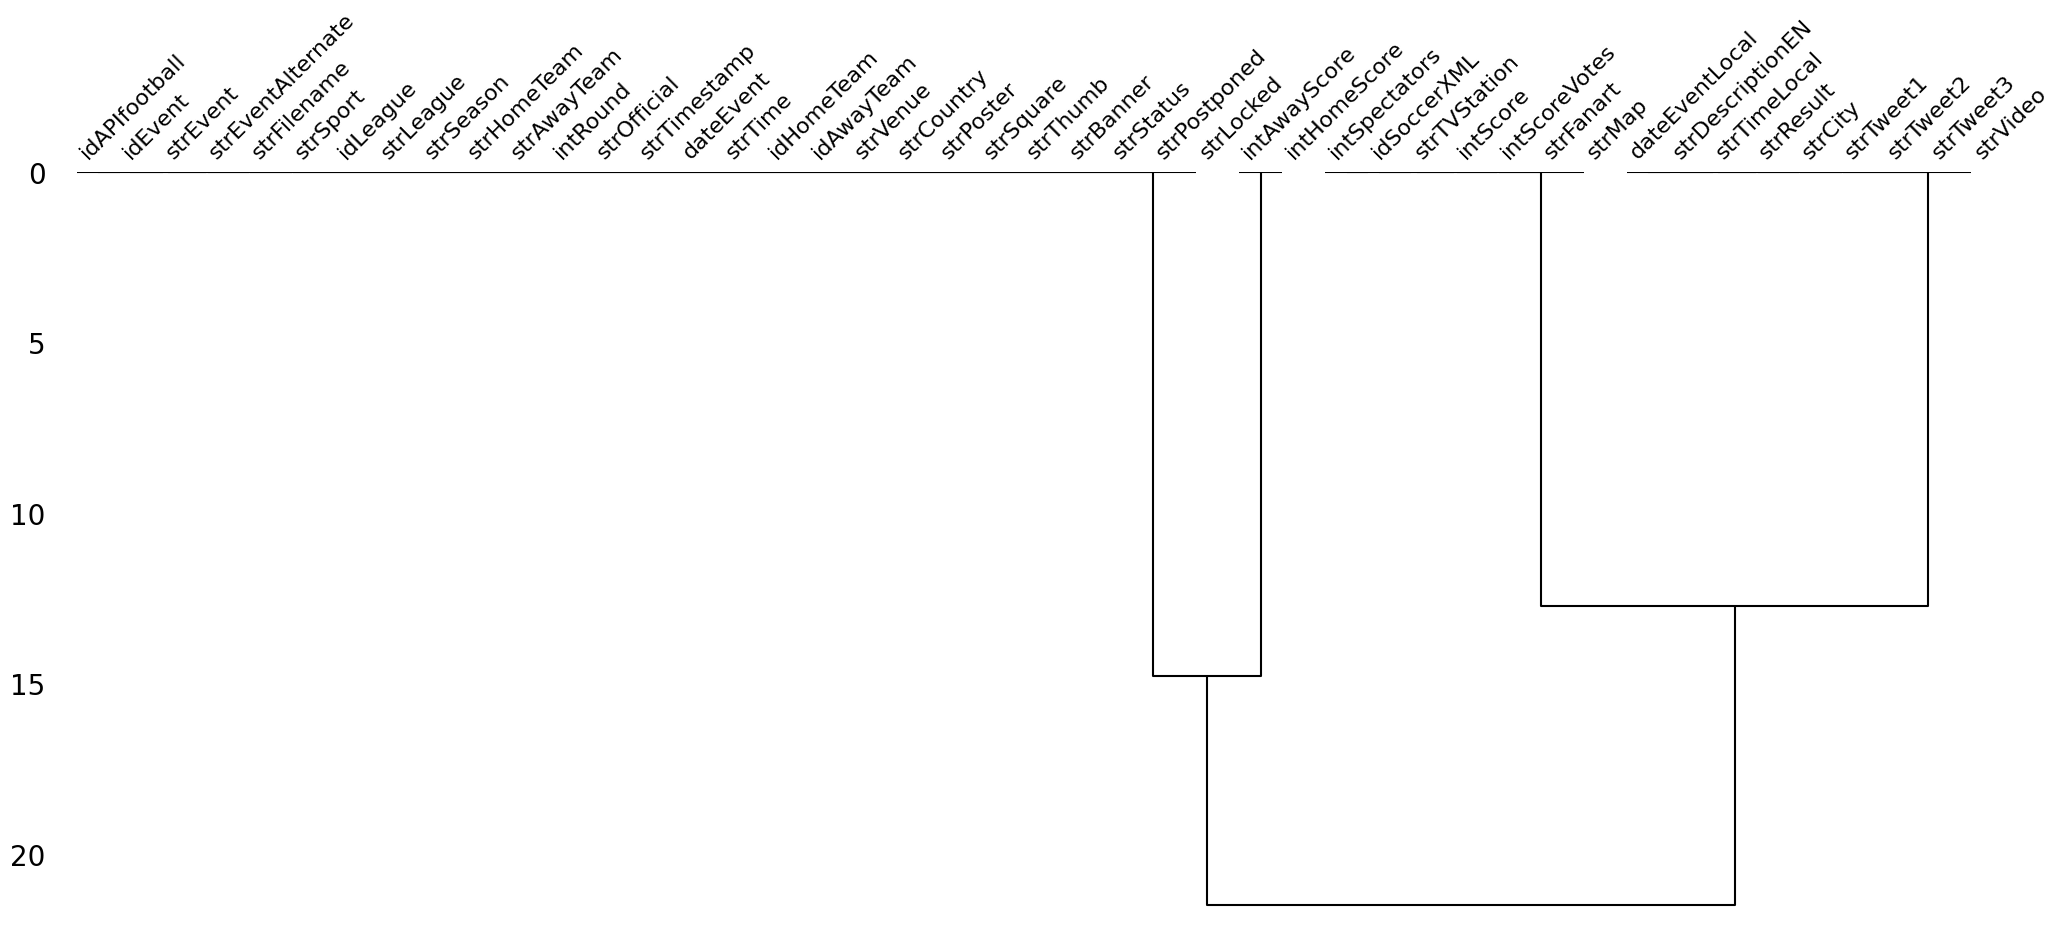

In [211]:
msno.dendrogram(liga_2023)

Podemos visualizar que hay 16 columnas que poseen datos nulos o con celdas faltantes.

Para poder limpiar y tener un Dataset correcto y con relevancia vamos a pasar a limpiar el mismo de estas columnas. Al mismo tiempo de analizar las columnas que si bien tienen datos no son relevantes para la finalidad del Proyecto, dado que a nosotros nos interesa obtener los datos de Fecha, Equipo Local, Equipo Visitante, Gol Local, Gol Visitante, Arbitro.

In [212]:
liga_2023.dateEventLocal.value_counts() # Decision: Borrar, ya existen columnas con dato de fecha

2023-07-06    6
2023-07-02    6
2023-06-12    5
2023-05-19    5
2023-07-05    5
2023-04-29    5
2023-05-29    5
2023-05-28    5
2023-07-09    5
2023-05-14    4
2023-05-08    4
2023-05-06    4
2023-07-01    4
2023-06-22    4
2023-05-15    4
2023-05-07    4
2023-07-10    4
2023-06-03    4
2023-06-13    4
2023-05-13    4
2023-05-21    4
2023-06-04    3
2023-05-20    3
2023-07-22    3
2023-06-30    3
2023-07-15    3
2023-06-25    3
2023-06-02    3
2023-04-30    3
2023-07-11    3
2023-06-17    3
2023-05-27    3
2023-06-10    3
2023-07-16    3
2023-07-14    3
2023-05-05    2
2023-07-07    2
2023-07-08    2
2023-06-01    2
2023-06-23    2
2023-06-21    2
2023-06-09    2
2023-05-12    2
2023-06-24    2
2023-04-28    1
2023-07-04    1
2023-07-03    1
2023-06-26    1
2023-05-26    1
2023-05-18    1
2023-07-23    1
Name: dateEventLocal, dtype: int64

In [213]:
liga_2023.isna().sum()

idEvent                0
idSoccerXML          574
idAPIfootball          0
strEvent               0
strEventAlternate      0
strFilename            0
strSport               0
idLeague               0
strLeague              0
strSeason              0
strDescriptionEN     412
strHomeTeam            0
strAwayTeam            0
intHomeScore         218
intRound               0
intAwayScore         218
intSpectators        574
strOfficial            0
strTimestamp           0
dateEvent              0
dateEventLocal       412
strTime                0
strTimeLocal         412
strTVStation         574
idHomeTeam             0
idAwayTeam             0
intScore             574
intScoreVotes        574
strResult            412
strVenue               0
strCountry             0
strCity              412
strPoster              0
strSquare              0
strFanart            574
strThumb               0
strBanner              0
strMap               574
strTweet1            412
strTweet2            412


In [214]:
col_elim=['idEvent','idAPIfootball','strEvent','strEventAlternate','idSoccerXML','strDescriptionEN','intSpectators','dateEventLocal','strTimeLocal','strTVStation','intScore','intScoreVotes','strResult','strCity','strFanart','strMap','strTweet1','strTweet2','strTweet3','strVideo']
col_elim

['idEvent',
 'idAPIfootball',
 'strEvent',
 'strEventAlternate',
 'idSoccerXML',
 'strDescriptionEN',
 'intSpectators',
 'dateEventLocal',
 'strTimeLocal',
 'strTVStation',
 'intScore',
 'intScoreVotes',
 'strResult',
 'strCity',
 'strFanart',
 'strMap',
 'strTweet1',
 'strTweet2',
 'strTweet3',
 'strVideo']

In [215]:
# Borrar columnas
liga_2023_x=liga_2023.drop(labels=col_elim, axis=1) # Borrando las columnas en col_elim
liga_2023_x.columns # Verificando las columnas que quedaron

Index(['strFilename', 'strSport', 'idLeague', 'strLeague', 'strSeason',
       'strHomeTeam', 'strAwayTeam', 'intHomeScore', 'intRound',
       'intAwayScore', 'strOfficial', 'strTimestamp', 'dateEvent', 'strTime',
       'idHomeTeam', 'idAwayTeam', 'strVenue', 'strCountry', 'strPoster',
       'strSquare', 'strThumb', 'strBanner', 'strStatus', 'strPostponed',
       'strLocked'],
      dtype='object')

Del nuevo DS siguen habiendo columnas que si bien tienen datos no son relevantes para el proyecto, por lo que también las eliminamos.

In [216]:
col_del=['idLeague','strLeague','strTimestamp','strTime','idHomeTeam','idAwayTeam','strFilename','strSport','strPoster','strSquare','strStatus','strPostponed','strLocked','strBanner','strCountry','strThumb']
col_del

['idLeague',
 'strLeague',
 'strTimestamp',
 'strTime',
 'idHomeTeam',
 'idAwayTeam',
 'strFilename',
 'strSport',
 'strPoster',
 'strSquare',
 'strStatus',
 'strPostponed',
 'strLocked',
 'strBanner',
 'strCountry',
 'strThumb']

In [217]:
df_2023=liga_2023_x.drop(labels=col_del, axis=1) # Borrando las columnas en col_del
df_2023.columns

Index(['strSeason', 'strHomeTeam', 'strAwayTeam', 'intHomeScore', 'intRound',
       'intAwayScore', 'strOfficial', 'dateEvent', 'strVenue'],
      dtype='object')

##a)Analisis de DF Final

In [218]:
#Nombre a index como 'id_partido'
df_2023.index.name='id_partido'

In [219]:
#Cambio tipo de Dato a Fecha a columna 'dateEvent'
df_2023['dateEvent']=pd.to_datetime(df_2023['dateEvent'])

In [220]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   strSeason     574 non-null    object        
 1   strHomeTeam   574 non-null    object        
 2   strAwayTeam   574 non-null    object        
 3   intHomeScore  356 non-null    object        
 4   intRound      574 non-null    object        
 5   intAwayScore  356 non-null    object        
 6   strOfficial   574 non-null    object        
 7   dateEvent     574 non-null    datetime64[ns]
 8   strVenue      574 non-null    object        
dtypes: datetime64[ns](1), object(8)
memory usage: 40.5+ KB


###Eliminación de partidos no disputados y equipos con más partidos
Para comparar correctamente los datos eliminamos los datos de partidos que aun no fueron disputados o bien de equipos que tienen más partidos.

En este caso se analiza hasta la fila 335 con el partido Atl. Tucumán vs Gimnasia LP correspondiente a la fecha 24 y al día 12/07/2023


In [221]:
df_2023

,strSeason,strHomeTeam,strAwayTeam,intHomeScore,intRound,intAwayScore,strOfficial,dateEvent,strVenue
id_partido,,,,,,,,,
0,2023,Rosario Central,Argentinos Juniors,1,1,0,Y. Falcón,2023-01-26,Estadio Gigante de Arroyito
1,2023,Estudiantes de la Plata,Tigre,1,1,2,F. Espinoza,2023-01-27,Estadio Jorge Luis Hirschi
2,2023,Talleres de Cordoba,Independiente,0,1,1,H. Mastrángelo,2023-01-27,Estadio Mario Alberto Kempes
3,2023,Defensa y Justicia,Huracan,2,1,4,S. Zunino,2023-01-28,Estadio Norberto Tito Tomaghello
4,2023,San Lorenzo,Arsenal Sarandi,1,1,0,"Fernando Echenique, Argentina",2023-01-28,Estadio Pedro Bidegaín
5,2023,Racing Club,Belgrano,0,1,0,"Dario Herrera, Argentina",2023-01-28,Estadio Presidente Juan Domingo Perón
6,2023,Colon,Lanus,1,1,2,"Pablo Dovalo, Argentina",2023-01-28,Estadio Brigadier General Estanislao López
7,2023,Instituto ACC,Sarmiento,0,1,0,"Andres Merlos, Argentina",2023-01-28,Estadio Juan Domingo Perón
8,2023,Central Córdoba de Santiago del Estero,River Plate,0,1,2,"Facundo Tello, Argentina",2023-01-29,Estadio Único Madre de Ciudades


In [222]:
#Borrar partidos que aun no se disputaron
liga_2023.info()
liga_2023 = df_2023.drop(df_2023.index[[df_2023.index>335]])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   idEvent            574 non-null    object
 1   idSoccerXML        0 non-null      object
 2   idAPIfootball      574 non-null    object
 3   strEvent           574 non-null    object
 4   strEventAlternate  574 non-null    object
 5   strFilename        574 non-null    object
 6   strSport           574 non-null    object
 7   idLeague           574 non-null    object
 8   strLeague          574 non-null    object
 9   strSeason          574 non-null    object
 10  strDescriptionEN   162 non-null    object
 11  strHomeTeam        574 non-null    object
 12  strAwayTeam        574 non-null    object
 13  intHomeScore       356 non-null    object
 14  intRound           574 non-null    object
 15  intAwayScore       356 non-null    object
 16  intSpectators      0 non-null      object
 1

/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:5339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


Se renombran columnas

In [223]:
df2_2023=liga_2023.rename(columns={'strSeason':'temporada','strHomeTeam':'local','strAwayTeam':'visitante','intHomeScore':'GL','intRound':'fecha torneo','intAwayScore':'GV','strOfficial':'arbitro','strVenue':'estadio','dateEvent':'fecha'})
df2_2023.head(336)

,temporada,local,visitante,GL,fecha torneo,GV,arbitro,fecha,estadio
id_partido,,,,,,,,,
0,2023,Rosario Central,Argentinos Juniors,1,1,0,Y. Falcón,2023-01-26,Estadio Gigante de Arroyito
1,2023,Estudiantes de la Plata,Tigre,1,1,2,F. Espinoza,2023-01-27,Estadio Jorge Luis Hirschi
2,2023,Talleres de Cordoba,Independiente,0,1,1,H. Mastrángelo,2023-01-27,Estadio Mario Alberto Kempes
3,2023,Defensa y Justicia,Huracan,2,1,4,S. Zunino,2023-01-28,Estadio Norberto Tito Tomaghello
4,2023,San Lorenzo,Arsenal Sarandi,1,1,0,"Fernando Echenique, Argentina",2023-01-28,Estadio Pedro Bidegaín
5,2023,Racing Club,Belgrano,0,1,0,"Dario Herrera, Argentina",2023-01-28,Estadio Presidente Juan Domingo Perón
6,2023,Colon,Lanus,1,1,2,"Pablo Dovalo, Argentina",2023-01-28,Estadio Brigadier General Estanislao López
7,2023,Instituto ACC,Sarmiento,0,1,0,"Andres Merlos, Argentina",2023-01-28,Estadio Juan Domingo Perón
8,2023,Central Córdoba de Santiago del Estero,River Plate,0,1,2,"Facundo Tello, Argentina",2023-01-29,Estadio Único Madre de Ciudades


In [224]:
df2_2023['GL']=df2_2023['GL'].astype(int)

In [225]:
df2_2023['GV']=df2_2023['GV'].astype(int)

In [226]:
df2_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   temporada     336 non-null    object        
 1   local         336 non-null    object        
 2   visitante     336 non-null    object        
 3   GL            336 non-null    int64         
 4   fecha torneo  336 non-null    object        
 5   GV            336 non-null    int64         
 6   arbitro       336 non-null    object        
 7   fecha         336 non-null    datetime64[ns]
 8   estadio       336 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 23.8+ KB


##b) Armado de DF Final para crear Storytelling



###Creación de tabla locales "df_home"

In [227]:
df2_2023.columns

Index(['temporada', 'local', 'visitante', 'GL', 'fecha torneo', 'GV',
       'arbitro', 'fecha', 'estadio'],
      dtype='object')

In [228]:
df_home=df2_2023.rename(columns={'local':'team','visitante':'opossing team','GL':'GFL','GV':'GCL'})

In [229]:
df_home

,temporada,team,opossing team,GFL,fecha torneo,GCL,arbitro,fecha,estadio
id_partido,,,,,,,,,
0,2023,Rosario Central,Argentinos Juniors,1,1,0,Y. Falcón,2023-01-26,Estadio Gigante de Arroyito
1,2023,Estudiantes de la Plata,Tigre,1,1,2,F. Espinoza,2023-01-27,Estadio Jorge Luis Hirschi
2,2023,Talleres de Cordoba,Independiente,0,1,1,H. Mastrángelo,2023-01-27,Estadio Mario Alberto Kempes
3,2023,Defensa y Justicia,Huracan,2,1,4,S. Zunino,2023-01-28,Estadio Norberto Tito Tomaghello
4,2023,San Lorenzo,Arsenal Sarandi,1,1,0,"Fernando Echenique, Argentina",2023-01-28,Estadio Pedro Bidegaín
5,2023,Racing Club,Belgrano,0,1,0,"Dario Herrera, Argentina",2023-01-28,Estadio Presidente Juan Domingo Perón
6,2023,Colon,Lanus,1,1,2,"Pablo Dovalo, Argentina",2023-01-28,Estadio Brigadier General Estanislao López
7,2023,Instituto ACC,Sarmiento,0,1,0,"Andres Merlos, Argentina",2023-01-28,Estadio Juan Domingo Perón
8,2023,Central Córdoba de Santiago del Estero,River Plate,0,1,2,"Facundo Tello, Argentina",2023-01-29,Estadio Único Madre de Ciudades


In [230]:
#NUEVA COLUMNA RESULTADO PARA TABLA LOCAL
df_home['result']=np.where(df_home['GFL']>df_home['GCL'],'G',np.where(df_home['GFL']<df_home['GCL'],'D','E'))

In [231]:
df_home['puntos local']=np.where(df_home['result']=='G',3,np.where(df_home['result']=='D',0,1))
df_home['PGL']=np.where(df_home['result']=='G',1,0)
df_home['PPL']=np.where(df_home['result']=='D',1,0)
df_home['PEL']=np.where(df_home['result']=='E',1,0)
df_home['Dif local']=df_home['GFL']-df_home['GCL']

df_home.head()

,temporada,team,opossing team,GFL,fecha torneo,GCL,arbitro,fecha,estadio,result,puntos local,PGL,PPL,PEL,Dif local
id_partido,,,,,,,,,,,,,,,
0,2023,Rosario Central,Argentinos Juniors,1,1,0,Y. Falcón,2023-01-26,Estadio Gigante de Arroyito,G,3,1,0,0,1
1,2023,Estudiantes de la Plata,Tigre,1,1,2,F. Espinoza,2023-01-27,Estadio Jorge Luis Hirschi,D,0,0,1,0,-1
2,2023,Talleres de Cordoba,Independiente,0,1,1,H. Mastrángelo,2023-01-27,Estadio Mario Alberto Kempes,D,0,0,1,0,-1
3,2023,Defensa y Justicia,Huracan,2,1,4,S. Zunino,2023-01-28,Estadio Norberto Tito Tomaghello,D,0,0,1,0,-2
4,2023,San Lorenzo,Arsenal Sarandi,1,1,0,"Fernando Echenique, Argentina",2023-01-28,Estadio Pedro Bidegaín,G,3,1,0,0,1


In [232]:
df_home.groupby('team').sum().sort_values(by='puntos local',ascending=False)

<ipython-input-232-0f66fb4863be>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_home.groupby('team').sum().sort_values(by='puntos local',ascending=False)


,GFL,GCL,puntos local,PGL,PPL,PEL,Dif local
team,,,,,,,
Rosario Central,24,8,31,9,0,4,16
River Plate,21,5,30,10,1,0,16
San Lorenzo,12,0,29,8,0,5,12
Lanus,16,7,25,8,2,1,9
Talleres de Cordoba,16,8,24,7,3,3,8
Godoy Cruz,21,9,24,7,1,3,12
Boca Juniors,17,9,24,7,3,3,8
Defensa y Justicia,18,11,23,6,2,5,7
Estudiantes de la Plata,18,10,23,6,2,5,8


###Creación de tabla locales "df_away"

In [233]:
df_away=df_home

In [234]:
df_away=df_away.rename(columns={'team':'opossing team','opossing team':'team','GFL':'GCV','GCL':'GFV','puntos local':'puntos visitante','Dif local':'Dif visitante','PGL':'PPV','PPL':'PGV','PEL':'PEV'})

In [235]:
#NUEVA COLUMNA RESULTADO PARA TABLA VISITANTE
df_away['result']=np.where(df_away['GCV']>df_away['GFV'],'D',np.where(df_away['GCV']<df_away['GFV'],'G','E'))

In [236]:
df_away['puntos visitante']=np.where(df_away['result']=='D',0,np.where(df_away['result']=='G',3,1))
df_away['PGV']=np.where(df_away['result']=='G',1,0)
df_away['PPV']=np.where(df_away['result']=='D',1,0)
df_away['PEV']=np.where(df_away['result']=='E',1,0)
df_away['Dif visitante']=df_away['GFV']-df_away['GCV']

df_away.head()

,temporada,opossing team,team,GCV,fecha torneo,GFV,arbitro,fecha,estadio,result,puntos visitante,PPV,PGV,PEV,Dif visitante
id_partido,,,,,,,,,,,,,,,
0,2023,Rosario Central,Argentinos Juniors,1,1,0,Y. Falcón,2023-01-26,Estadio Gigante de Arroyito,D,0,1,0,0,-1
1,2023,Estudiantes de la Plata,Tigre,1,1,2,F. Espinoza,2023-01-27,Estadio Jorge Luis Hirschi,G,3,0,1,0,1
2,2023,Talleres de Cordoba,Independiente,0,1,1,H. Mastrángelo,2023-01-27,Estadio Mario Alberto Kempes,G,3,0,1,0,1
3,2023,Defensa y Justicia,Huracan,2,1,4,S. Zunino,2023-01-28,Estadio Norberto Tito Tomaghello,G,3,0,1,0,2
4,2023,San Lorenzo,Arsenal Sarandi,1,1,0,"Fernando Echenique, Argentina",2023-01-28,Estadio Pedro Bidegaín,D,0,1,0,0,-1


In [237]:
df_away.groupby('team').sum().sort_values(by='puntos visitante',ascending=False)

<ipython-input-237-87d9ecbe7e3f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_away.groupby('team').sum().sort_values(by='puntos visitante',ascending=False)


,GCV,GFV,puntos visitante,PPV,PGV,PEV,Dif visitante
team,,,,,,,
River Plate,10,21,24,3,7,3,11
Talleres de Cordoba,12,22,21,2,6,3,10
Defensa y Justicia,8,13,17,4,5,2,5
Estudiantes de la Plata,9,9,16,3,4,4,0
Lanus,16,17,16,3,3,7,1
San Lorenzo,9,10,14,3,3,5,1
Belgrano,14,8,14,7,4,2,-6
Sarmiento,10,7,13,6,3,4,-3
Godoy Cruz,17,10,13,6,3,4,-7


In [238]:
team_stats = pd.concat([df_home, df_away])

In [239]:
team_stats.columns

Index(['temporada', 'team', 'opossing team', 'GFL', 'fecha torneo', 'GCL',
       'arbitro', 'fecha', 'estadio', 'result', 'puntos local', 'PGL', 'PPL',
       'PEL', 'Dif local', 'GCV', 'GFV', 'puntos visitante', 'PPV', 'PGV',
       'PEV', 'Dif visitante'],
      dtype='object')

In [240]:
team_stats.isnull().sum()
team_stats=team_stats.fillna(0)

In [241]:
team_stats.isnull().sum()

temporada           0
team                0
opossing team       0
GFL                 0
fecha torneo        0
GCL                 0
arbitro             0
fecha               0
estadio             0
result              0
puntos local        0
PGL                 0
PPL                 0
PEL                 0
Dif local           0
GCV                 0
GFV                 0
puntos visitante    0
PPV                 0
PGV                 0
PEV                 0
Dif visitante       0
dtype: int64

In [242]:
team_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 0 to 335
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   temporada         672 non-null    object        
 1   team              672 non-null    object        
 2   opossing team     672 non-null    object        
 3   GFL               672 non-null    float64       
 4   fecha torneo      672 non-null    object        
 5   GCL               672 non-null    float64       
 6   arbitro           672 non-null    object        
 7   fecha             672 non-null    datetime64[ns]
 8   estadio           672 non-null    object        
 9   result            672 non-null    object        
 10  puntos local      672 non-null    float64       
 11  PGL               672 non-null    float64       
 12  PPL               672 non-null    float64       
 13  PEL               672 non-null    float64       
 14  Dif local         672 non-

In [243]:
team_stats['puntos'] = team_stats['puntos local'] + team_stats['puntos visitante']

In [244]:
team_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 0 to 335
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   temporada         672 non-null    object        
 1   team              672 non-null    object        
 2   opossing team     672 non-null    object        
 3   GFL               672 non-null    float64       
 4   fecha torneo      672 non-null    object        
 5   GCL               672 non-null    float64       
 6   arbitro           672 non-null    object        
 7   fecha             672 non-null    datetime64[ns]
 8   estadio           672 non-null    object        
 9   result            672 non-null    object        
 10  puntos local      672 non-null    float64       
 11  PGL               672 non-null    float64       
 12  PPL               672 non-null    float64       
 13  PEL               672 non-null    float64       
 14  Dif local         672 non-

###Tabla de posiciones Final

In [245]:
team_stats['PJL']=team_stats['PGL']+team_stats['PPL']+team_stats['PEL']
team_stats['PJV']=team_stats['PGV']+team_stats['PPV']+team_stats['PEV']

In [246]:
#FUERZA ATAQUE Y DEFENSA LOCAL Y VISITANTE

#LOCAL
team_stats['mGFL']=(team_stats['GFL']/team_stats['PJL'])*0.1
team_stats['mGCL']=(team_stats['GCL']/team_stats['PJL'])*0.1

#VISITANTE
team_stats['mGFV']=(team_stats['GFV']/team_stats['PJV'])*0.1
team_stats['mGCV']=(team_stats['GCV']/team_stats['PJV'])*0.1

In [247]:
df=team_stats.groupby('team').sum().sort_values(by='puntos',ascending=False)

<ipython-input-247-01077a996060>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=team_stats.groupby('team').sum().sort_values(by='puntos',ascending=False)


In [248]:
df

,GFL,GCL,puntos local,PGL,PPL,PEL,Dif local,GCV,GFV,puntos visitante,...,PGV,PEV,Dif visitante,puntos,PJL,PJV,mGFL,mGCL,mGFV,mGCV
team,,,,,,,,,,,,,,,,,,,,,
River Plate,21.0,5.0,30.0,10.0,1.0,0.0,16.0,10.0,21.0,24.0,...,7.0,3.0,11.0,54.0,11.0,13.0,2.1,0.5,2.1,1.0
Talleres de Cordoba,16.0,8.0,24.0,7.0,3.0,3.0,8.0,12.0,22.0,21.0,...,6.0,3.0,10.0,45.0,13.0,11.0,1.6,0.8,2.2,1.2
San Lorenzo,12.0,0.0,29.0,8.0,0.0,5.0,12.0,9.0,10.0,14.0,...,3.0,5.0,1.0,43.0,13.0,11.0,1.2,0.0,1.0,0.9
Lanus,16.0,7.0,25.0,8.0,2.0,1.0,9.0,16.0,17.0,16.0,...,3.0,7.0,1.0,41.0,11.0,13.0,1.6,0.7,1.7,1.6
Defensa y Justicia,18.0,11.0,23.0,6.0,2.0,5.0,7.0,8.0,13.0,17.0,...,5.0,2.0,5.0,40.0,13.0,11.0,1.8,1.1,1.3,0.8
Rosario Central,24.0,8.0,31.0,9.0,0.0,4.0,16.0,17.0,8.0,8.0,...,1.0,5.0,-9.0,39.0,13.0,11.0,2.4,0.8,0.8,1.7
Estudiantes de la Plata,18.0,10.0,23.0,6.0,2.0,5.0,8.0,9.0,9.0,16.0,...,4.0,4.0,0.0,39.0,13.0,11.0,1.8,1.0,0.9,0.9
Godoy Cruz,21.0,9.0,24.0,7.0,1.0,3.0,12.0,17.0,10.0,13.0,...,3.0,4.0,-7.0,37.0,11.0,13.0,2.1,0.9,1.0,1.7
Belgrano,12.0,7.0,21.0,6.0,2.0,3.0,5.0,14.0,8.0,14.0,...,4.0,2.0,-6.0,35.0,11.0,13.0,1.2,0.7,0.8,1.4


In [249]:
tabla=pd.DataFrame(df)
tabla.columns

Index(['GFL', 'GCL', 'puntos local', 'PGL', 'PPL', 'PEL', 'Dif local', 'GCV',
       'GFV', 'puntos visitante', 'PPV', 'PGV', 'PEV', 'Dif visitante',
       'puntos', 'PJL', 'PJV', 'mGFL', 'mGCL', 'mGFV', 'mGCV'],
      dtype='object')

In [250]:
tabla['puntos ideales local']=tabla['PJL']*3
tabla['puntos ideales visitante']=tabla['PJV']*3
tabla['%PL']=tabla['puntos local']/tabla['puntos ideales local']
tabla['%PV']=tabla['puntos visitante']/tabla['puntos ideales visitante']

In [251]:
tabla

,GFL,GCL,puntos local,PGL,PPL,PEL,Dif local,GCV,GFV,puntos visitante,...,PJL,PJV,mGFL,mGCL,mGFV,mGCV,puntos ideales local,puntos ideales visitante,%PL,%PV
team,,,,,,,,,,,,,,,,,,,,,
River Plate,21.0,5.0,30.0,10.0,1.0,0.0,16.0,10.0,21.0,24.0,...,11.0,13.0,2.1,0.5,2.1,1.0,33.0,39.0,0.909091,0.615385
Talleres de Cordoba,16.0,8.0,24.0,7.0,3.0,3.0,8.0,12.0,22.0,21.0,...,13.0,11.0,1.6,0.8,2.2,1.2,39.0,33.0,0.615385,0.636364
San Lorenzo,12.0,0.0,29.0,8.0,0.0,5.0,12.0,9.0,10.0,14.0,...,13.0,11.0,1.2,0.0,1.0,0.9,39.0,33.0,0.743590,0.424242
Lanus,16.0,7.0,25.0,8.0,2.0,1.0,9.0,16.0,17.0,16.0,...,11.0,13.0,1.6,0.7,1.7,1.6,33.0,39.0,0.757576,0.410256
Defensa y Justicia,18.0,11.0,23.0,6.0,2.0,5.0,7.0,8.0,13.0,17.0,...,13.0,11.0,1.8,1.1,1.3,0.8,39.0,33.0,0.589744,0.515152
Rosario Central,24.0,8.0,31.0,9.0,0.0,4.0,16.0,17.0,8.0,8.0,...,13.0,11.0,2.4,0.8,0.8,1.7,39.0,33.0,0.794872,0.242424
Estudiantes de la Plata,18.0,10.0,23.0,6.0,2.0,5.0,8.0,9.0,9.0,16.0,...,13.0,11.0,1.8,1.0,0.9,0.9,39.0,33.0,0.589744,0.484848
Godoy Cruz,21.0,9.0,24.0,7.0,1.0,3.0,12.0,17.0,10.0,13.0,...,11.0,13.0,2.1,0.9,1.0,1.7,33.0,39.0,0.727273,0.333333
Belgrano,12.0,7.0,21.0,6.0,2.0,3.0,5.0,14.0,8.0,14.0,...,11.0,13.0,1.2,0.7,0.8,1.4,33.0,39.0,0.636364,0.358974


Gracias a la tabla "team_stats" finalizamos la creación de la tabla de posiciones "tabla" agrupando por equipo.

A continuación se muestran los significados de cada una de estas columnas para luego ingresar en el Storytelling del proyecto.

#3) Preguntas/hipótesis que queremos responder

In [252]:
#Importar librerias
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Gracias a la API The Sports DB se pudo generar un dataset con todos los resultados hasta el día 12/07/2023 de la Liga Argentina de Fútbol Argentino 2023.

En este caso evaluaremos através de variables como:

*   "GFL": Goles a favor convertidos de local.
*   "GCL": Goles en contra que le convirtieron al equipo.
*   "puntos local": Puntos conseguidos de local.
*   "PGL": Partidos ganados de local.
*   "PPL": Partidos perdidos de local.
*   "PEL": Partidos empatados de local.
*   "Dif local": Diferencia de goles de local.
*   "GCV": Goles a favor convertidos de visitante.
*   "GFV": Goles en contra que le convirtieron al equipo.
*   "puntos visitante": Puntos conseguidos de visitante.
*   "PPV": Partidos perdidos de visitante.
*   "PGV": Partidos ganados de visitante.
*   "PEV": Partidos empatados de visitante.
*   "Dif visitante":  Diferencia de goles de visitante.
*   "puntos": Puntos conseguidos en total.
*   "PJL": Partidos jugados de local.
*   "PJV": Partidos jugados de visitante.
*   "%PGL":Porcentaje de partidos ganados de local.
*   "%PL": Porcentaje de puntos conseguidos de local, teniendo en cuenta los puntos obtenidos y los puntos posibles.
*    "%PV": Porcentaje de puntos conseguidos de visitante, teniendo en cuenta los puntos obtenidos y los puntos posibles.
*   "mGFL": Media de goles convertidos de local.
*   "mGCL":	Media de goles en contra de local.
*   "mGFV": Media de goles convertidos de visitante.
*   "mGCV": Media de goles en contra de visitante.

Además del DataFram base "team_stats" también vamos a trabajar con la tabla "tabla" que tiene la tabla de posiciones finales.

Mediante estos dataset vamos a poder realizar un analisis univariado y bivariado gracias a las variables antes descriptas y poder responder e ir desglozando un analisis desde los puntos totales obtenidos por los equipos hasta la intervención de la media de goles convertidos de visitante y como esas comparaciones pueden darnos una perspectiva a las hipotesis de peso al jugar de local, nivel o parejo del torneo, rendimiento de los equipos.

* Introducción ¿Como se distribuyen los puntos totales obtenidos hasta la fecha?

##¿Cómo se distribuyen los puntos totales obtenidos hasta la fecha?

<Axes: xlabel='Equipos', ylabel='Puntos'>

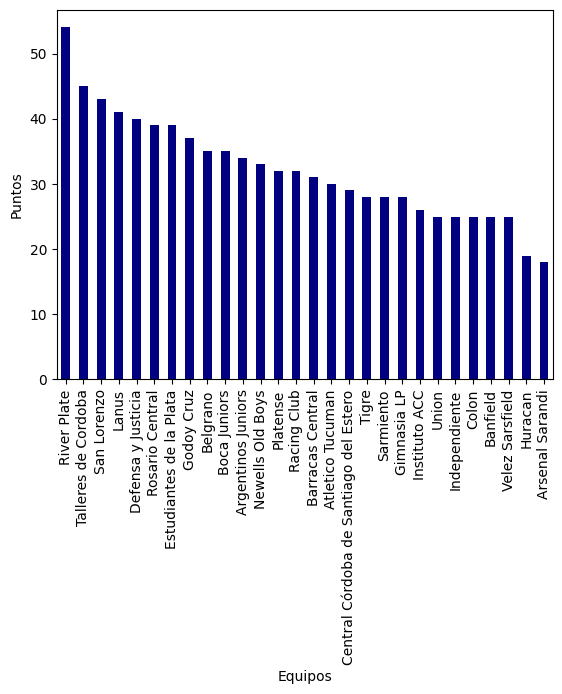

In [253]:
tabla['puntos'].plot.bar(xlabel='Equipos',ylabel='Puntos',color='navy')

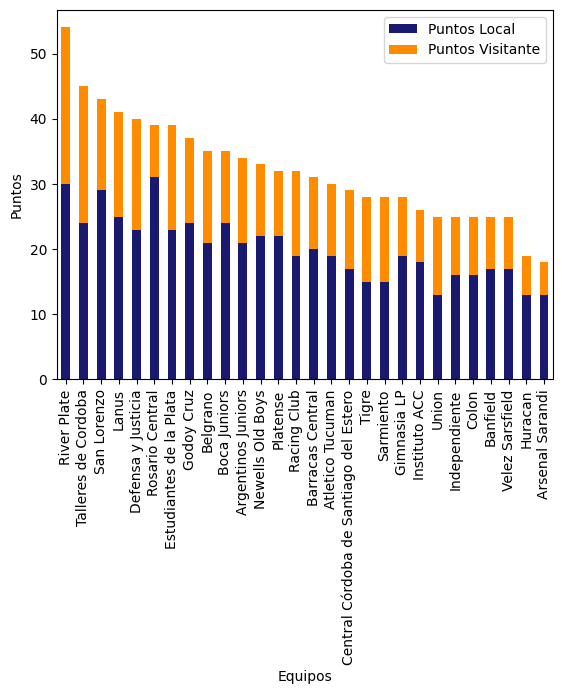

In [254]:
df = pd.DataFrame({'Puntos Local': tabla['puntos local'],
                   'Puntos Visitante': tabla['puntos visitante']})
ax = df.plot.bar(stacked=True,color={"Puntos Local":"midnightblue","Puntos Visitante":"darkorange"},xlabel='Equipos',ylabel='Puntos')

Respuesta: Al día de la fecha, 16/7/2023, ya conocemos que el equipo campeón es River Plate pero para poder realizar un analisis parejo es que tomamos los datos hasta el 12/7/2023 donde no existen partidos pendientes.

En un primer gráfico podemos ver los puntos obtenidos por cada uno de los equipos en las 24 fechas disputadas, a simple vista podemos ver como la diferencia entre River Plate (1°) y su seguidor Talleres (2°) es de una diferencia mayor a la que desde el 2° hasta el 28° tienen entre si.

Esto significa que desde el 2° puesto hasta el 28° la mayor diferencia luego del 1° la encontramos entre el 26° con el 27° (5 puntos), por lo que podemos analizar o preguntar si esto es un indicativo de lo parejo del torneo y la irregularidad de los equipos.

Para ello, también agregamos un gráfico que dió pie a este analisis considerando *¿cómo se distribuyen los puntos de los equipos en condición de local y visitante?*

Gracias a este segundo gráfico vemos que la mayor porción de puntos de los equipos es jugando de local, por lo que entendemos del peso que tiene para los equipos jugar en su estadio con su gente.

Para ello realizamos este proyecto de obtención de insights e intentar responder y llegar a conclusiones sobre el peso de las localias mediante las siguientes preguntas:

1) ¿Cómo fue la distribución de puntos obtenidos de local y visitante por cada uno de los equipos?

2) ¿Cómo es la comparación de la media de goles convertidos por los equipos tanto de local como de visitante?

3) ¿Los equipos cuando juegan de local tienen la misma cantidad de goles en contra que de visitante?

Además de esta hipotesis de localia podemos analizar, en relación con ella también, los datos del rendimiento de los equipos, en función de las medias de goles que convierntes a favor como en contra tanto de local como visitante, además de los resultados. Este es un primer analisis gracias a los dataset de resultados de los encuentros y tabla de posiciones, se debe poder complementar para que sea más preciso con el detalle del partido, las condiciones del plantel del equipo, lesiones.

4) ¿Cómo se relacionan los % de Puntos obtenidos respecto al rendimiento actual?

5) Rendimiento en función de las medias de goles a favor y en contra de local y visitante.

##1) Porcentaje de Puntos obtenidos de Local vs Visitante


Text(0.5, 1.0, '%Puntos obtenidos de visitante')

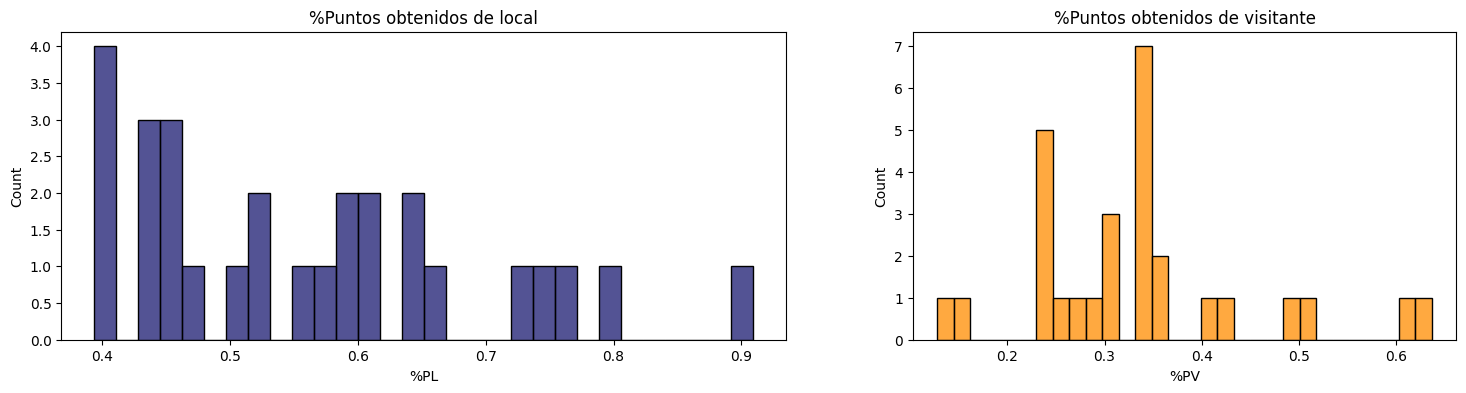

In [255]:
f, axs = plt.subplots(1, 2, figsize=(18, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.histplot(data=tabla, x="%PL",ax=axs[0],bins=30,color='midnightblue')
sns.histplot(data=tabla, x="%PV",ax=axs[1],bins=30,color='darkorange')
axs[0].set_title('%Puntos obtenidos de local')
axs[1].set_title('%Puntos obtenidos de visitante')

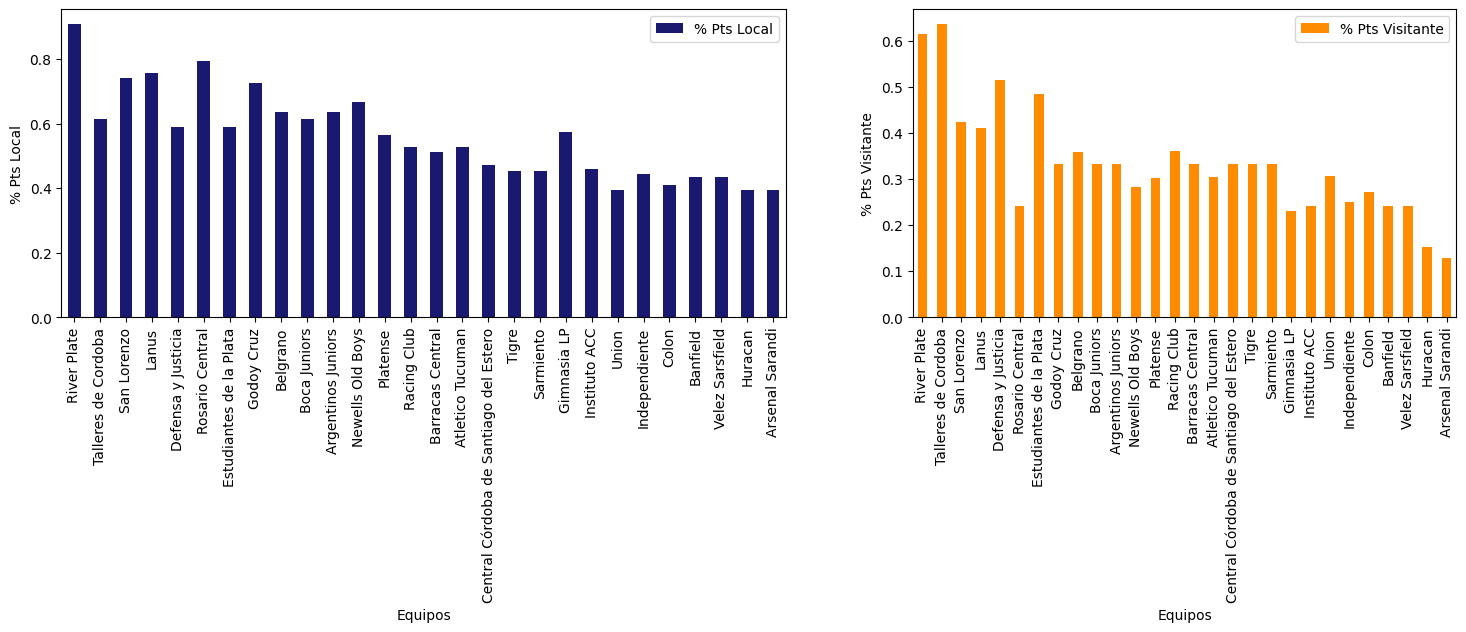

In [256]:
f, axs = plt.subplots(1, 2, figsize=(18, 4), gridspec_kw=dict(width_ratios=[4, 3]))
df1 = pd.DataFrame({'% Pts Local': tabla['%PL']})
df2 = pd.DataFrame({'% Pts Visitante': tabla['%PV']})
ax = df1.plot.bar(color='midnightblue',xlabel='Equipos',ylabel='% Pts Local',ax=axs[0])
ax = df2.plot.bar(color='darkorange',xlabel='Equipos',ylabel='% Pts Visitante',ax=axs[1])

In [257]:
tabla.describe()

,GFL,GCL,puntos local,PGL,PPL,PEL,Dif local,GCV,GFV,puntos visitante,...,PJL,PJV,mGFL,mGCL,mGFV,mGCV,puntos ideales local,puntos ideales visitante,%PL,%PV
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,...,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,14.357143,10.035714,20.214286,5.464286,2.714286,3.821429,4.321429,14.357143,10.035714,11.964286,...,12.000000,12.000000,1.435714,1.003571,1.003571,1.435714,36.000000,36.000000,0.562195,0.333687
std,4.227023,3.564040,4.961759,1.855565,1.410467,1.700840,5.862963,3.753658,4.211819,4.211819,...,0.942809,0.942809,0.422702,0.356404,0.421182,0.375366,2.828427,2.828427,0.136365,0.118081
min,7.000000,0.000000,13.000000,3.000000,0.000000,0.000000,-4.000000,8.000000,5.000000,5.000000,...,11.000000,11.000000,0.700000,0.000000,0.500000,0.800000,33.000000,33.000000,0.393939,0.128205
25%,11.750000,8.000000,16.750000,4.000000,2.000000,3.000000,-0.250000,11.750000,7.000000,9.000000,...,11.000000,11.000000,1.175000,0.800000,0.700000,1.175000,33.000000,33.000000,0.452020,0.248106
50%,14.500000,10.500000,19.500000,5.000000,3.000000,4.000000,3.500000,14.000000,9.000000,11.500000,...,12.000000,12.000000,1.450000,1.050000,0.900000,1.400000,36.000000,36.000000,0.545940,0.333333
75%,16.250000,12.000000,23.250000,6.250000,4.000000,5.000000,8.000000,17.000000,10.000000,13.250000,...,13.000000,13.000000,1.625000,1.200000,1.000000,1.700000,39.000000,39.000000,0.636364,0.359509
max,24.000000,16.000000,31.000000,10.000000,6.000000,8.000000,16.000000,24.000000,22.000000,24.000000,...,13.000000,13.000000,2.400000,1.600000,2.200000,2.400000,39.000000,39.000000,0.909091,0.636364


Respuesta: Podemos decir que la localia tiene un peso mayor en los partidos dado que 17 (60,71%) equipos han obtenido más del 50% de los puntos disputados.

Mientras que solo 3 (10,71%) equipos obtuvieron más del 50% de los puntos disputados cuando jugaron de visitante.

El objetivo de este analisis es ver el peso de la localia por lo tanto evaluar el 50% de los puntos obtenidos de local capaz no es un parametro de rendimiento si comparamos entre los equipos que consiguieron una mejor posición pero en terminos comparativos podemos ver que desde el 50% tomamos un punto de comparación entre jugar de local como jugar de visitante. Tenemos en cuenta además que en lo que va del torneo la media de este punto es del 56,22%, mientras que de Visitante es 33,37%.

##2) Evaluación de la media de goles convertidos de Local vs Visitante


<Axes: xlabel='Local / Visitante', ylabel='Media Goles'>

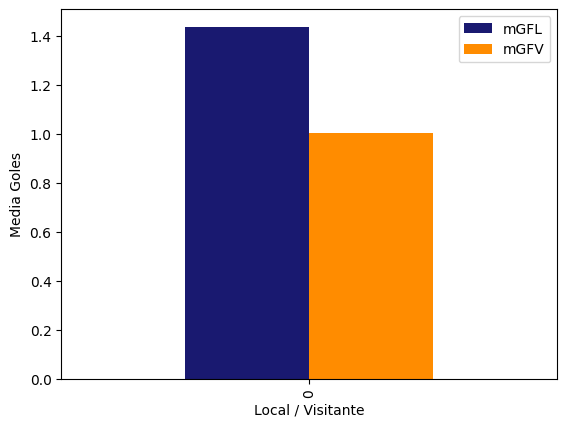

In [258]:
media_gl=(tabla['mGFL'].sum())/28
media_gv=(tabla['mGFV'].sum())/28

columns=["mGFL","mGFV"]
medias=[(tabla['mGFL'].sum())/28,(tabla['mGFV'].sum())/28]

df= pd.DataFrame([medias],columns=columns)

df.plot.bar(xlabel='Local / Visitante',ylabel='Media Goles',color={"mGFL":"midnightblue","mGFV":"darkorange"})

Text(0.5, 1.0, 'Media de Goles Visitante')

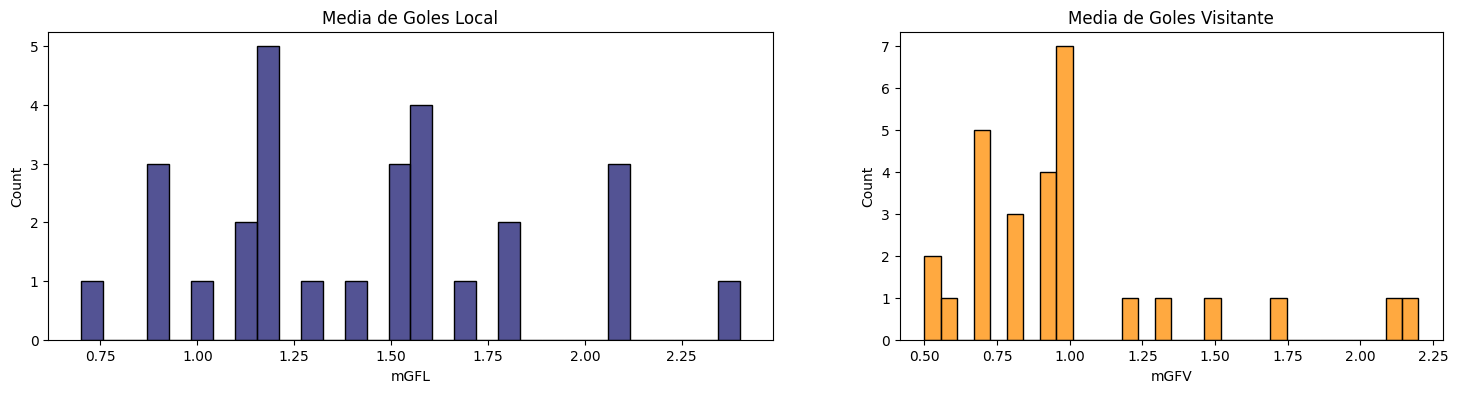

In [259]:
f, axs = plt.subplots(1, 2, figsize=(18, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.histplot(data=tabla, x="mGFL",ax=axs[0],bins=30,color='midnightblue')
sns.histplot(data=tabla, x="mGFV",ax=axs[1],bins=30,color='darkorange')
axs[0].set_title('Media de Goles Local')
axs[1].set_title('Media de Goles Visitante')

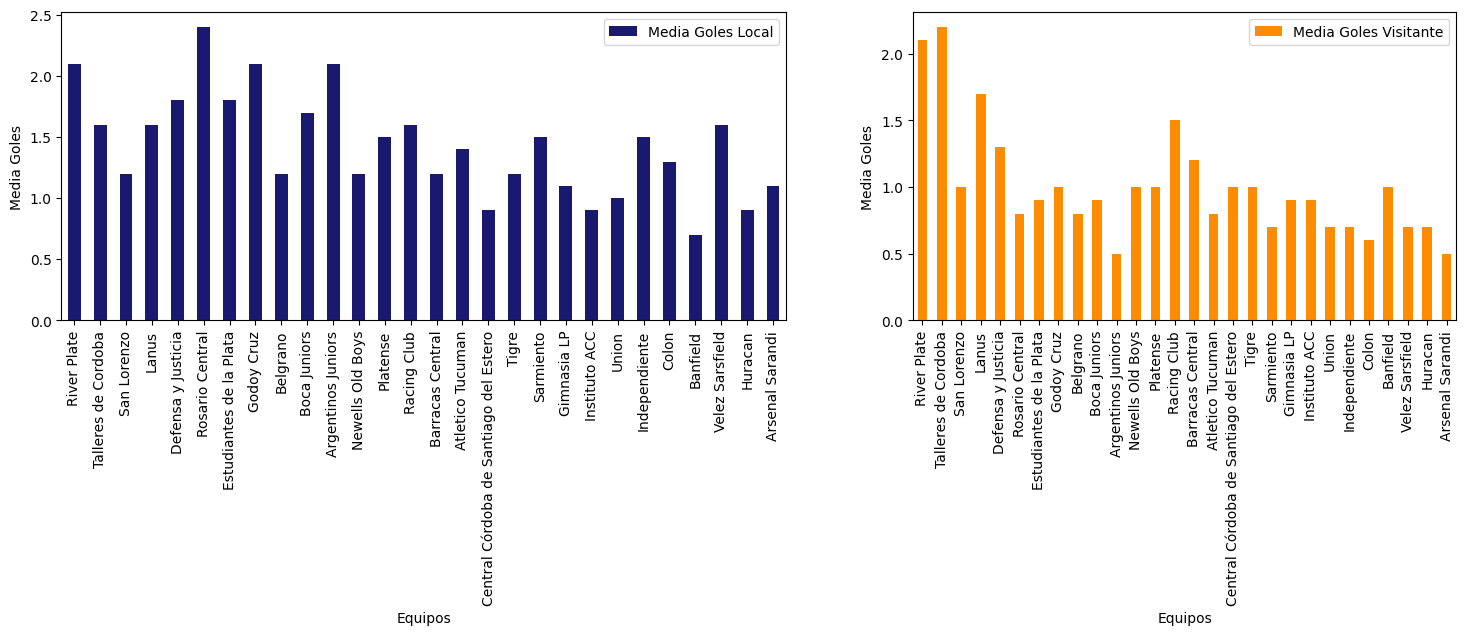

In [260]:
f, axs = plt.subplots(1, 2, figsize=(18, 4), gridspec_kw=dict(width_ratios=[4, 3]))
df1 = pd.DataFrame({'Media Goles Local': tabla['mGFL']})
df2 = pd.DataFrame({'Media Goles Visitante': tabla['mGFV']})
ax = df1.plot.bar(color='midnightblue',xlabel='Equipos',ylabel='Media Goles',ax=axs[0])
ax = df2.plot.bar(color='darkorange',xlabel='Equipos',ylabel='Media Goles',ax=axs[1])

Respuesta: Mediante las tres visualizaciones anteriores evaluamos las medias de goles de local y visitante.

1) En el primer caso una media general donde vimos que la mGFL es mayor a la mGFV, esto nos da una primera aproximación a que jugar de local tiene un beneficio mayor para los equipos relacionado también con lo parejo del torneo.

2) El segundo gráfico realiza un analisis bivariado de la mGFL y mGFV, mostrandonos la cantidad de equipos y sus respectivas medias, la conclusión que podemos obtener de este gráfico es que hay más equipos que tienen una media mayor a 1 de local que de visitante, hay 24 equipos que por lo menos hacen 1 gol por partido de local. Mientras que de visitante este número baja considerablemente dado que la cantidad de equipos que supera la media de 1 gol por partido es 6 representando el 21,42% de los equipos.

3) El objetivo del tercer gráfico es representar que equipos tienen estas medias.

Gracias a estos tres gráficos podemos avanzar en la conclusión que los equipos de local poseen una iniciativa mayor para intentar conseguir un gol. Esta conclusión nos ayuda a continuar con este analisis y posteriormente intentaremos ver de los mejores 10 equipos del torneo como se han distribuido las medias de goles a favor y en contra jugando de local y visitante.

##3) Media de Goles en Contra de Local vs Visitante

<Axes: xlabel='Local / Visitante', ylabel='Media Goles'>

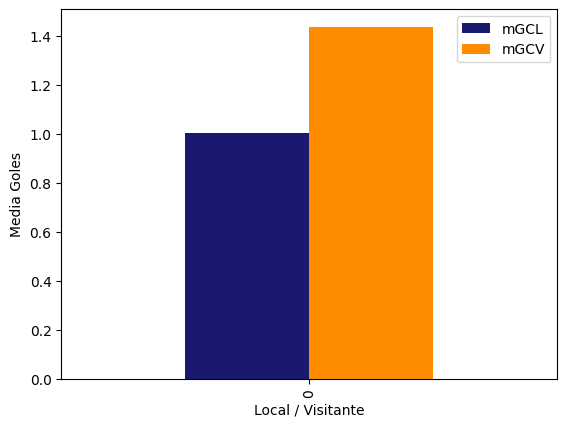

In [261]:
media_gcl=(tabla['mGCL'].sum())/28
media_gcv=(tabla['mGCV'].sum())/28

columns=["mGCL","mGCV"]
medias=[(tabla['mGCL'].sum())/28,(tabla['mGCV'].sum())/28]

df= pd.DataFrame([medias],columns=columns)

df.plot.bar(xlabel='Local / Visitante',ylabel='Media Goles',color={"mGCL":"midnightblue","mGCV":"darkorange"})

Text(0.5, 1.0, 'Media de Goles en Contra Visitante')

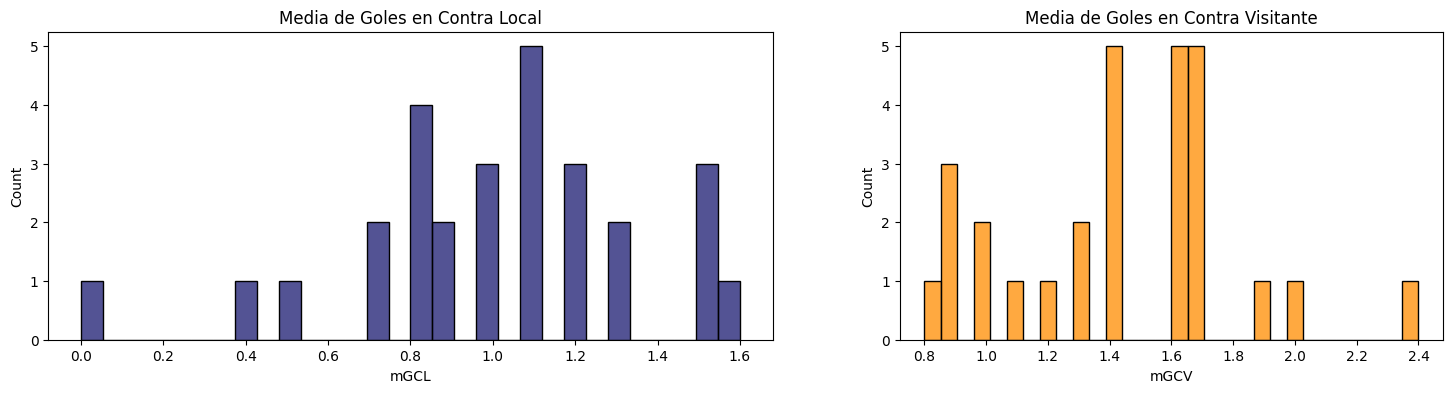

In [262]:
f, axs = plt.subplots(1, 2, figsize=(18, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.histplot(data=tabla, x="mGCL",ax=axs[0],bins=30,color='midnightblue')
sns.histplot(data=tabla, x="mGCV",ax=axs[1],bins=30,color='darkorange')
axs[0].set_title('Media de Goles en Contra Local')
axs[1].set_title('Media de Goles en Contra Visitante')

Respuesta: Este analisis bivariado nos muestra nuevamente el peso de la localia pero desde la perspectiva de los goles en contra que reciben los equipos jugando de local como jugando de visitante.

Esto se puede relacionar con lo parejo de los equipos y las diferentes variables no analizadas que tienen que ver con el desarrollo del juego y del contexto de cada plantel.

## 4) Porcentaje Puntos de Local y Visitante TOP 10 del torneo

<Axes: xlabel='%PL', ylabel='%PV'>

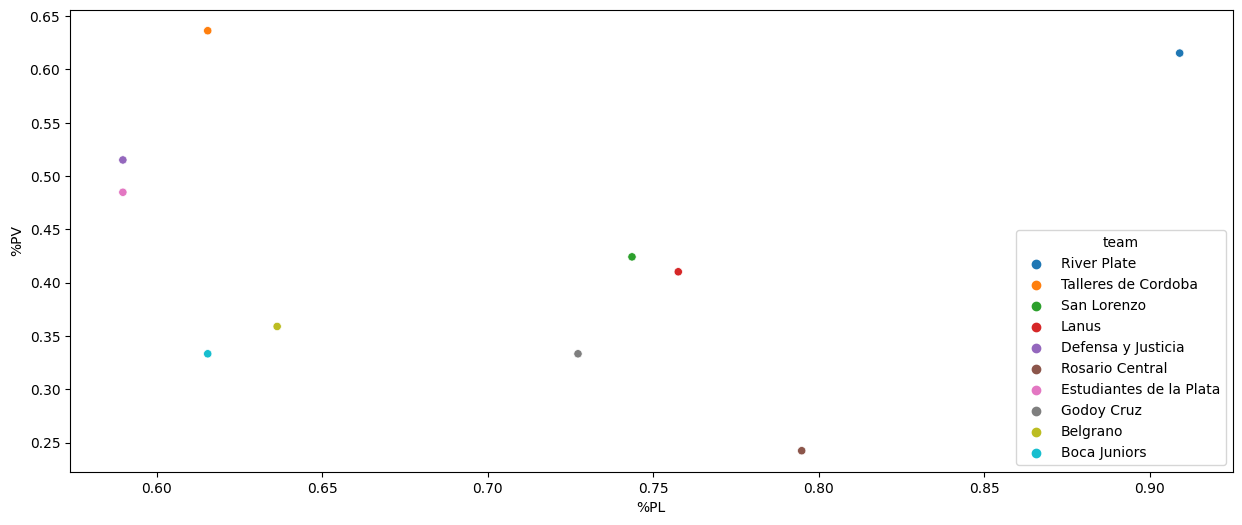

In [263]:
f,axs=plt.subplots(figsize=(15, 6))
sns.scatterplot(data=tabla.head(10),x='%PL',y='%PV',hue='team')

In [264]:
toplocal = tabla.sort_values('%PL',ascending=False).head(10)
toplocal

,GFL,GCL,puntos local,PGL,PPL,PEL,Dif local,GCV,GFV,puntos visitante,...,PJL,PJV,mGFL,mGCL,mGFV,mGCV,puntos ideales local,puntos ideales visitante,%PL,%PV
team,,,,,,,,,,,,,,,,,,,,,
River Plate,21.0,5.0,30.0,10.0,1.0,0.0,16.0,10.0,21.0,24.0,...,11.0,13.0,2.1,0.5,2.1,1.0,33.0,39.0,0.909091,0.615385
Rosario Central,24.0,8.0,31.0,9.0,0.0,4.0,16.0,17.0,8.0,8.0,...,13.0,11.0,2.4,0.8,0.8,1.7,39.0,33.0,0.794872,0.242424
Lanus,16.0,7.0,25.0,8.0,2.0,1.0,9.0,16.0,17.0,16.0,...,11.0,13.0,1.6,0.7,1.7,1.6,33.0,39.0,0.757576,0.410256
San Lorenzo,12.0,0.0,29.0,8.0,0.0,5.0,12.0,9.0,10.0,14.0,...,13.0,11.0,1.2,0.0,1.0,0.9,39.0,33.0,0.743590,0.424242
Godoy Cruz,21.0,9.0,24.0,7.0,1.0,3.0,12.0,17.0,10.0,13.0,...,11.0,13.0,2.1,0.9,1.0,1.7,33.0,39.0,0.727273,0.333333
Newells Old Boys,12.0,4.0,22.0,6.0,1.0,4.0,8.0,17.0,10.0,11.0,...,11.0,13.0,1.2,0.4,1.0,1.7,33.0,39.0,0.666667,0.282051
Belgrano,12.0,7.0,21.0,6.0,2.0,3.0,5.0,14.0,8.0,14.0,...,11.0,13.0,1.2,0.7,0.8,1.4,33.0,39.0,0.636364,0.358974
Argentinos Juniors,21.0,10.0,21.0,6.0,2.0,3.0,11.0,9.0,5.0,13.0,...,11.0,13.0,2.1,1.0,0.5,0.9,33.0,39.0,0.636364,0.333333
Boca Juniors,17.0,9.0,24.0,7.0,3.0,3.0,8.0,13.0,9.0,11.0,...,13.0,11.0,1.7,0.9,0.9,1.3,39.0,33.0,0.615385,0.333333


In [265]:
topvisita = tabla.sort_values('%PV',ascending=False).head(10)
topvisita

,GFL,GCL,puntos local,PGL,PPL,PEL,Dif local,GCV,GFV,puntos visitante,...,PJL,PJV,mGFL,mGCL,mGFV,mGCV,puntos ideales local,puntos ideales visitante,%PL,%PV
team,,,,,,,,,,,,,,,,,,,,,
Talleres de Cordoba,16.0,8.0,24.0,7.0,3.0,3.0,8.0,12.0,22.0,21.0,...,13.0,11.0,1.6,0.8,2.2,1.2,39.0,33.0,0.615385,0.636364
River Plate,21.0,5.0,30.0,10.0,1.0,0.0,16.0,10.0,21.0,24.0,...,11.0,13.0,2.1,0.5,2.1,1.0,33.0,39.0,0.909091,0.615385
Defensa y Justicia,18.0,11.0,23.0,6.0,2.0,5.0,7.0,8.0,13.0,17.0,...,13.0,11.0,1.8,1.1,1.3,0.8,39.0,33.0,0.589744,0.515152
Estudiantes de la Plata,18.0,10.0,23.0,6.0,2.0,5.0,8.0,9.0,9.0,16.0,...,13.0,11.0,1.8,1.0,0.9,0.9,39.0,33.0,0.589744,0.484848
San Lorenzo,12.0,0.0,29.0,8.0,0.0,5.0,12.0,9.0,10.0,14.0,...,13.0,11.0,1.2,0.0,1.0,0.9,39.0,33.0,0.743590,0.424242
Lanus,16.0,7.0,25.0,8.0,2.0,1.0,9.0,16.0,17.0,16.0,...,11.0,13.0,1.6,0.7,1.7,1.6,33.0,39.0,0.757576,0.410256
Racing Club,16.0,15.0,19.0,5.0,3.0,4.0,1.0,16.0,15.0,13.0,...,12.0,12.0,1.6,1.5,1.5,1.6,36.0,36.0,0.527778,0.361111
Belgrano,12.0,7.0,21.0,6.0,2.0,3.0,5.0,14.0,8.0,14.0,...,11.0,13.0,1.2,0.7,0.8,1.4,33.0,39.0,0.636364,0.358974
Sarmiento,15.0,12.0,15.0,4.0,4.0,3.0,3.0,10.0,7.0,13.0,...,11.0,13.0,1.5,1.2,0.7,1.0,33.0,39.0,0.454545,0.333333


Respuesta: Si queremos realizar un analisis bivariado de los porcentajes de puntos obtenidos sobre los ideales discriminado por la condición local o visitante, ya vimos que la mayor porción de puntos los equipos la obtienen de local pero con este gráfico podemos visualizar algunas conclusiones preliminares sobre el rendimiento final, sin tener en cuenta como ya se explico previamente otras variables por las limitaciones que presentan estos dataset.

* River Plate al 12/7 previo a la consagración es el equipo que posee mayor cantidad de % de puntos obtenidos de local dado que pasa el 90%.
* Posterior a River Plate no es Talleres sino que es Rosario Central con casi el 80% de los puntos obtenidos de local.
* Talleres de Cordoba posee una particularidad dado que es el equipo que obtuvo mayor cantidad de puntos de visitante 63,64%, condición díficil pero de local solo obtuvo el 61,54% siendo el 10° en esta condición.
* Por últmo, Rosario Central a pesar de ser el segundo mejor equipo de Local, de visitante solo obtuvo 24,24%

##5) Rendimiento en función de las medias de goles a favor y en contra de local y visitante.

Text(0.5, 1.0, 'Goles a Favor vs en Contra Visitante')

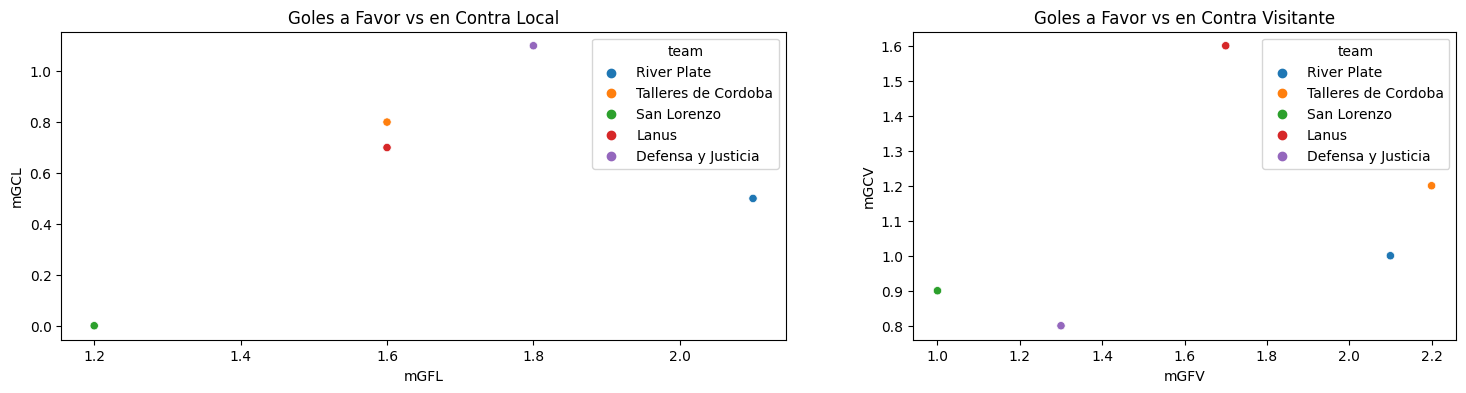

In [266]:
f, axs = plt.subplots(1, 2, figsize=(18, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=tabla.head(),x='mGFL',y='mGCL',hue='team',ax=axs[0])
sns.scatterplot(data=tabla.head(),x='mGFV',y='mGCV',hue='team',ax=axs[1])
axs[0].set_title('Goles a Favor vs en Contra Local')
axs[1].set_title('Goles a Favor vs en Contra Visitante')

Respuesta: Mediante este gráfico podemos dar un indicio o tener un primer dato si queremos evaluar los aspectos ofensivos y defensivos de los equipos.

* San Lorenzo se destaca por ser un equipo que se despega del resto teniendo una Media de goles a Favor de 1.2, mientras que de local no recibió goles. De Visitante no es la excepción dado que gracias a su defensa logró tener una media de goles en contra de 0.9.

* River Plate en estos 4 aspectos pareciera explicar parte de su campeonato dado que es el equipo con mejor media de goles convertidos de local, 2.1 mientras que en goles convertidos es de 0.5. De Visitante la media de goles hechos no varia y si aumenta la de goles en contra siendo el 3° mejor equipo detrás de Defensa y Justicia y el mencionado San Lorenzo.

Se mencionan estos dos casos como para dar un pequeño indicio de la propuesta de ambos equipos.

* Por último, Talleres es el equipo con mejor media de goles a favor jugando de visitante, 2.2, cifra que no puede alcanzar de local, relacionado al porcentaje de puntos obtenidos de local donde ya vimos que no es de los más altos.

##6) Rendimiento fecha a fecha River Plate vs Talleres de Cordoba

In [267]:
talleres=team_stats[team_stats['team'].str.contains('Talleres de Cordoba',case=False,na=False,regex=True)]
talleres

river=team_stats[team_stats['team'].str.contains('River Plate',case=False,na=False,regex=True)]
river

,temporada,team,opossing team,GFL,fecha torneo,GCL,arbitro,fecha,estadio,result,...,PGV,PEV,Dif visitante,puntos,PJL,PJV,mGFL,mGCL,mGFV,mGCV
id_partido,,,,,,,,,,,,,,,,,,,,,
37,2023,River Plate,Argentinos Juniors,2.0,3,1.0,"Fernando Rapallini, Argentina",2023-02-12,Estadio Monumental Antonio Vespucio Liberti,G,...,0.0,0.0,0.0,3.0,1.0,0.0,0.2,0.1,NaN,NaN
64,2023,River Plate,Arsenal Sarandi,1.0,5,2.0,"Nicolas Ramirez, Argentina",2023-02-26,Estadio Mâs Monumental,D,...,0.0,0.0,0.0,0.0,1.0,0.0,0.1,0.2,NaN,NaN
92,2023,River Plate,Godoy Cruz,3.0,7,0.0,"Silvio Trucco, Argentina",2023-03-12,Estadio Mâs Monumental,G,...,0.0,0.0,0.0,3.0,1.0,0.0,0.3,0.0,NaN,NaN
116,2023,River Plate,Union,1.0,9,0.0,F. Echenique,2023-04-01,Estadio Mâs Monumental,G,...,0.0,0.0,0.0,3.0,1.0,0.0,0.1,0.0,NaN,NaN
152,2023,River Plate,Gimnasia LP,3.0,11,0.0,"Dario Herrera, Argentina",2023-04-13,Estadio Mâs Monumental,G,...,0.0,0.0,0.0,3.0,1.0,0.0,0.3,0.0,NaN,NaN
177,2023,River Plate,Independiente,2.0,13,0.0,"Andres Merlos, Argentina",2023-04-23,Estadio Mâs Monumental,G,...,0.0,0.0,0.0,3.0,1.0,0.0,0.2,0.0,NaN,NaN
202,2023,River Plate,Boca Juniors,1.0,15,0.0,,2023-05-07,Estadio Mâs Monumental,G,...,0.0,0.0,0.0,3.0,1.0,0.0,0.1,0.0,NaN,NaN
233,2023,River Plate,Platense,2.0,17,1.0,,2023-05-21,Estadio Mâs Monumental,G,...,0.0,0.0,0.0,3.0,1.0,0.0,0.2,0.1,NaN,NaN
279,2023,River Plate,Defensa y Justicia,1.0,19,0.0,,2023-06-18,Estadio Mâs Monumental,G,...,0.0,0.0,0.0,3.0,1.0,0.0,0.1,0.0,NaN,NaN


In [268]:
river['%puntos local']=(river['puntos local']/(river['PJL']*3))*0.1
talleres['%puntos local']=(talleres['puntos local']/(talleres['PJL']*3))*0.1
river['%puntos visitante']=(river['puntos visitante']/(river['PJV']*3))*0.1
talleres['%puntos visitante']=(talleres['puntos visitante']/(talleres['PJV']*3))*0.1

<ipython-input-268-8d638d079a43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  river['%puntos local']=(river['puntos local']/(river['PJL']*3))*0.1
<ipython-input-268-8d638d079a43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  talleres['%puntos local']=(talleres['puntos local']/(talleres['PJL']*3))*0.1
<ipython-input-268-8d638d079a43>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

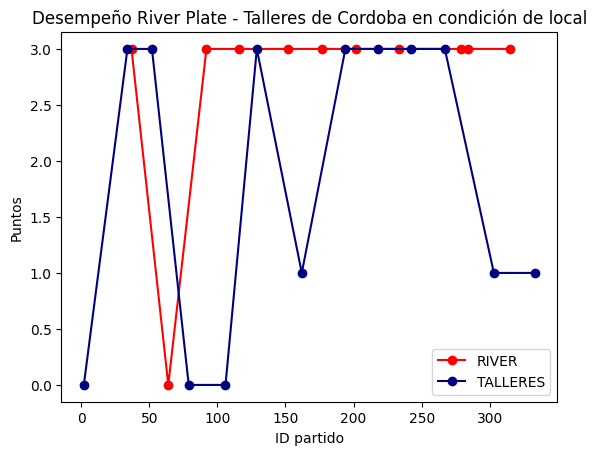

In [269]:
prog_riverlocal=river[river['%puntos local']>=0]
plt.plot(prog_riverlocal['puntos local'],label='RIVER',color='r',marker="o")

prog_tallereslocal=talleres[talleres['%puntos local']>=0]
plt.plot(prog_tallereslocal['puntos local'],label='TALLERES',color='navy',marker="o")

plt.xlabel("ID partido")
plt.ylabel("Puntos")
plt.title("Desempeño River Plate - Talleres de Cordoba en condición de local")
plt.legend()

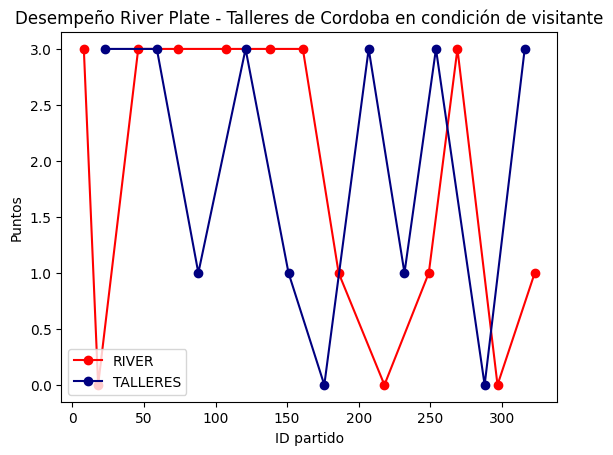

In [270]:
prog_rivervisita=river[river['%puntos visitante']>=0]
plt.plot(prog_rivervisita['puntos visitante'],label='RIVER',color='r',marker="o")

prog_talleresvisita=talleres[talleres['%puntos visitante']>=0]
plt.plot(prog_talleresvisita['puntos visitante'],label='TALLERES',color='navy',marker="o")

plt.xlabel("ID partido")
plt.ylabel("Puntos")
plt.title("Desempeño River Plate - Talleres de Cordoba en condición de visitante")
plt.legend()

Respuesta: Gracias a este gráfico podemos ver el progreso de cada uno de los partidos de local y visitante y podemos visualizar lo que explicamos anteriormente sobre los porcentajes de puntos obtenidos por parte de Talleres de Cordoba en condición de local que no permitieron que pelee un poco más el torneo dado que de visitante fue el mejor equipo.

##7) Conclusiones

Se reitera nuevamente que el objetivo de este trabajo es a partir de la conexión con una API, The Sports DB, obtener los resultados deportivos de una liga de fútbol para posteriormente realizar la tabla de posiciones final. Con esta tabla generar las columnas de media de goles, porcentajes de puntos obtenidos de local y visitante.

Una vez generado esto, nos preguntamos sobre el peso de la localia y poder ver los rendimientos de los equipos con los datos antes generados.

Pudimos obtener las siguientes respuestas respecto al peso de las localias:

* 17 (60,71%) equipos han obtenido más del 50% de los puntos disputados jugando de local.
* 3 (10,71%) equipos obtuvieron más del 50% de los puntos disputados cuando jugaron de visitante.
* La mGFL es mayor a la mGFV.
* 24 equipos tienen al menos una media de 1 gol por partido de local. * 6 equipos tienen una media de 1 gol por partido jugando de visitante, corresponde al 21,42% de los equipos.
* 14 equipos (50%) reciben una media de 1 gol o más en contra jugando de local.
* 22 equipos () reciben una media de 1 gol o más por partido cuando juegan de visitante.

Respecto al rendimiento pudimos obtener:

* River Plate es el mejor equipo en materia de puntos obtenidos de local y el 2° equipo de puntos obtenidos de visitante.

* Talleres, River y Defensa y Justicia son los tres equipos que obtuvieron más del 50% de puntos respecto al ideal.

* Talleres de Cordoba obtuvo mayor cantidad de puntos de visitante 63,64%, pero de local casi paso el 60%. Esto se ve también en la gráfica 6 donde vemos los rendimientos del equipo.

* Por últmo, Rosario Central a pesar de ser el segundo mejor equipo de Local, de visitante solo obtuvo 24,24%.


Esta fue una primera aproximación respecto a una hipotesis basada en datos, a futuro esto puede escalar agregando datos como:

* Goles a Favor y en contra.
* Posesion.
* Cantidad de pases
* Tipo de pases(adelante,atrás,laterales).
* Porcentaje de pases acertados/errados.
* Calendario del equipo.
* Lesionados.
* Pelotas recuperadas.
* Tiempo en terreno rival.
Estos datos no permiten saber si pueden repetir la formación los equipos y las dificultades que tienen.



#4) Modelo Regresion Lineal

In [272]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
tabla.head()

,GFL,GCL,puntos local,PGL,PPL,PEL,Dif local,GCV,GFV,puntos visitante,...,PJL,PJV,mGFL,mGCL,mGFV,mGCV,puntos ideales local,puntos ideales visitante,%PL,%PV
team,,,,,,,,,,,,,,,,,,,,,
River Plate,21.0,5.0,30.0,10.0,1.0,0.0,16.0,10.0,21.0,24.0,...,11.0,13.0,2.1,0.5,2.1,1.0,33.0,39.0,0.909091,0.615385
Talleres de Cordoba,16.0,8.0,24.0,7.0,3.0,3.0,8.0,12.0,22.0,21.0,...,13.0,11.0,1.6,0.8,2.2,1.2,39.0,33.0,0.615385,0.636364
San Lorenzo,12.0,0.0,29.0,8.0,0.0,5.0,12.0,9.0,10.0,14.0,...,13.0,11.0,1.2,0.0,1.0,0.9,39.0,33.0,0.743590,0.424242
Lanus,16.0,7.0,25.0,8.0,2.0,1.0,9.0,16.0,17.0,16.0,...,11.0,13.0,1.6,0.7,1.7,1.6,33.0,39.0,0.757576,0.410256
Defensa y Justicia,18.0,11.0,23.0,6.0,2.0,5.0,7.0,8.0,13.0,17.0,...,13.0,11.0,1.8,1.1,1.3,0.8,39.0,33.0,0.589744,0.515152


----------------------------------------------------------------


###1) Dependencia del % Puntos obtenidos de local vs Puntos totales



In [ ]:
#DEPENDENCIA DE LOS PUNTOS TOTALES DEL % DE PUNTOS OBTENIDOS DE LOCAL RESPECTO AL IDEAL
#X VARIABLE INDEPENDIENTE
x=tabla['puntos']
#Y VARIABLE DEPENDIENTE
y=tabla['%PL']

In [ ]:
#Datos que sirven para el entrenamiento
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=42)

print("X_train")
print(X_train)
print("y_train")
print(y_train)
print("X_test")
print(X_test)


#Modelo Regresion Lineal
#Reshape para que pueda recibir los datos como corresponde
X_train=X_train.values.reshape([X_train.values.shape[0],1])
X_test=X_test.values.reshape([X_test.values.shape[0],1])

#Entrenamiento del Modelo
regr=linear_model.LinearRegression()
regr.fit(X_train,y_train)

Error:  0.004684007345713659
Valor r2: 0.7504136491194213


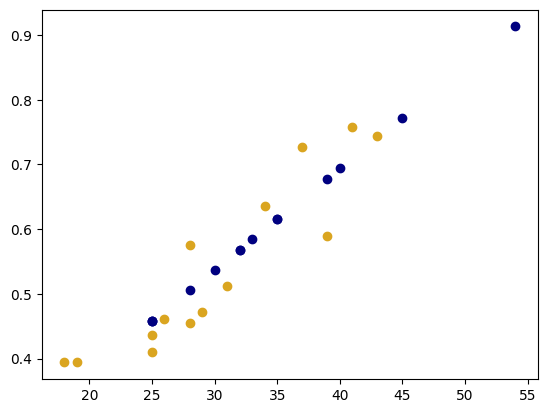

In [ ]:
#X_test conjunto de datos que utilizo para hacer las pruebas
y_pred=regr.predict(X_test)

plt.scatter(X_train,y_train,color='goldenrod')
plt.scatter(X_test,y_pred,color='navy')

#Error de la distancia entre lo real y lo predecible
print("Error: ",mean_squared_error(y_test,y_pred))
print("Valor r2:",r2_score(y_test,y_pred))

In [ ]:
df=pd.DataFrame({'real':y_test,"pred":y_pred})
df

,real,pred
team,,
Boca Juniors,0.615385,0.615381
Velez Sarsfield,0.435897,0.458683
Belgrano,0.636364,0.615381
Union,0.393939,0.458683
River Plate,0.909091,0.913107
Platense,0.564103,0.568372
Tigre,0.454545,0.505693
Independiente,0.444444,0.458683
Newells Old Boys,0.666667,0.584042


----------------------------------------------------------------


###2) Dependencia del % Puntos obtenidos de visitante vs Puntos totales


In [273]:
#DEPENDENCIA DE LOS PUNTOS TOTALES DEL % DE PUNTOS OBTENIDOS DE VISITANTE RESPECTO AL IDEAL
#X VARIABLE INDEPENDIENTE
x=tabla['puntos']
#Y VARIABLE DEPENDIENTE
y=tabla['%PV']

In [ ]:
#Datos que sirven para el entrenamiento
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=42)

print("X_train")
print(X_train)
print("y_train")
print(y_train)
print("X_test")
print(X_test)


#Modelo Regresion Lineal
#Reshape para que pueda recibir los datos como corresponde
X_train=X_train.values.reshape([X_train.values.shape[0],1])
X_test=X_test.values.reshape([X_test.values.shape[0],1])

#Entrenamiento del Modelo
regr=linear_model.LinearRegression()
regr.fit(X_train,y_train)

Error:  0.005349806946779875
Valor r2: 0.6621804115709591


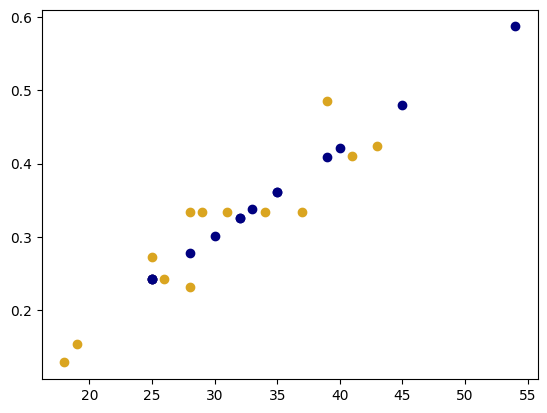

In [275]:
#X_test conjunto de datos que utilizo para hacer las pruebas
y_pred=regr.predict(X_test)

plt.scatter(X_train,y_train,color='goldenrod')
plt.scatter(X_test,y_pred,color='navy')

#Error de la distancia entre lo real y lo predecible
print("Error: ",mean_squared_error(y_test,y_pred))
print("Valor r2:",r2_score(y_test,y_pred))

In [276]:
df=pd.DataFrame({'real':y_test,"pred":y_pred})
df

,real,pred
team,,
Boca Juniors,0.333333,0.360998
Velez Sarsfield,0.242424,0.241958
Belgrano,0.358974,0.360998
Union,0.307692,0.241958
River Plate,0.615385,0.587175
Platense,0.303030,0.325286
Tigre,0.333333,0.277670
Independiente,0.250000,0.241958
Newells Old Boys,0.282051,0.337190


#5) Random Forest

In [277]:
tabla.head()

,GFL,GCL,puntos local,PGL,PPL,PEL,Dif local,GCV,GFV,puntos visitante,...,PJL,PJV,mGFL,mGCL,mGFV,mGCV,puntos ideales local,puntos ideales visitante,%PL,%PV
team,,,,,,,,,,,,,,,,,,,,,
River Plate,21.0,5.0,30.0,10.0,1.0,0.0,16.0,10.0,21.0,24.0,...,11.0,13.0,2.1,0.5,2.1,1.0,33.0,39.0,0.909091,0.615385
Talleres de Cordoba,16.0,8.0,24.0,7.0,3.0,3.0,8.0,12.0,22.0,21.0,...,13.0,11.0,1.6,0.8,2.2,1.2,39.0,33.0,0.615385,0.636364
San Lorenzo,12.0,0.0,29.0,8.0,0.0,5.0,12.0,9.0,10.0,14.0,...,13.0,11.0,1.2,0.0,1.0,0.9,39.0,33.0,0.743590,0.424242
Lanus,16.0,7.0,25.0,8.0,2.0,1.0,9.0,16.0,17.0,16.0,...,11.0,13.0,1.6,0.7,1.7,1.6,33.0,39.0,0.757576,0.410256
Defensa y Justicia,18.0,11.0,23.0,6.0,2.0,5.0,7.0,8.0,13.0,17.0,...,13.0,11.0,1.8,1.1,1.3,0.8,39.0,33.0,0.589744,0.515152


###1) Predicción de puntos en función a

*   Media Goles a favor de Local
*   Media Goles en contra de Local
*   Media Goles a favor de Visitante
*   Media Goles en contra de Visitante




In [278]:
#MODELO X=mGFL, mGCL, mGFV, mGCV // Y=puntos
X= tabla[['mGFL', 'mGCL', 'mGFV','mGCV']]
y= tabla[['puntos']]


#entrenamiento
#Datos que sirven para el entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

(22, 4) (6, 4) (22, 1) (6, 4)


<ipython-input-278-a9477cd08fb2>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, y_train)


In [279]:
reg.score(X_test, y_test)

0.5295756756756755

In [280]:
print(X_test)
print(y_pred)
print(y_test)

                 mGFL  mGCL  mGFV  mGCV
team                                   
Boca Juniors      1.7   0.9   0.9   1.3
Velez Sarsfield   1.6   1.1   0.7   1.4
Belgrano          1.2   0.7   0.8   1.4
Union             1.0   1.2   0.7   1.3
River Plate       2.1   0.5   2.1   1.0
Platense          1.5   1.1   1.0   1.6
[39.24 33.96 33.63 23.26 41.26 30.81]
                 puntos
team                   
Boca Juniors       35.0
Velez Sarsfield    25.0
Belgrano           35.0
Union              25.0
River Plate        54.0
Platense           32.0


-----------------------------------------

###2) Predicción de puntos en func

*   Media Goles a favor de Local
*   Media Goles en contra de Local
*   Media Goles a favor de Visitante
*   Media Goles en contra de Visitante
*   Porcentaje de puntos obtenidos de local sobre los ideales
*   Porcentaje de puntos obtenidos de visitante sobre los ideales

In [281]:
#MODELO X=mGFL, mGCL, mGFV, mGCV, %PL, %PV // Y=puntos
X= tabla[['mGFL', 'mGCL', 'mGFV','mGCV','%PL','%PV']]
y= tabla[['puntos']]


#entrenamiento
#Datos que sirven para el entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

(22, 6) (6, 6) (22, 1) (6, 6)


<ipython-input-281-b3c29fb15a03>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, y_train)


In [282]:
reg.score(X_test, y_test)

0.7329515276145712

In [283]:
print(X_test)
print(y_pred)

                 mGFL  mGCL  mGFV  mGCV       %PL       %PV
team                                                       
Boca Juniors      1.7   0.9   0.9   1.3  0.615385  0.333333
Velez Sarsfield   1.6   1.1   0.7   1.4  0.435897  0.242424
Belgrano          1.2   0.7   0.8   1.4  0.636364  0.358974
Union             1.0   1.2   0.7   1.3  0.393939  0.307692
River Plate       2.1   0.5   2.1   1.0  0.909091  0.615385
Platense          1.5   1.1   1.0   1.6  0.564103  0.303030
[36.44 26.68 36.06 23.37 42.07 31.29]


-----------------------------------------------------------------

###3) Predicción de puntos en función a

*   Partidos jugados de local
*   Partidos jugados de visitante
*   Porcentaje de puntos obtenidos de local sobre los ideales
*   Porcentaje de puntos obtenidos de visitante sobre los ideales

In [284]:
#MODELO X=PJL, PJV, %PL, %PV // Y=puntos
X= tabla[['PJL','PJV','%PL','%PV']]
y= tabla[['puntos']]


#entrenamiento
#Datos que sirven para el entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

(22, 4) (6, 4) (22, 1) (6, 4)


<ipython-input-284-69ff1b3d1c8c>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, y_train)


In [285]:
reg.score(X_test, y_test)

0.6900975323149237

----------------------------------------------------------------


###4) Predicción de Partidos ganados de local en función a

* Media de goles a favor de Local
* Media de goles en contra de Local

In [286]:
#MODELO X=mGFL, mGCL // Y=Partidos Ganados de Local
X= tabla[['mGFL', 'mGCL']]
y= tabla[['PGL']]


#entrenamiento
#Datos que sirven para el entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

(22, 2) (6, 2) (22, 1) (6, 2)


<ipython-input-286-764a1fcb4db1>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, y_train)


In [287]:
reg.score(X_test, y_test)

0.6143808612440191

In [288]:
print(y_pred)
print(y_test)

[6.94 5.3  6.35 3.39 7.51 4.71]
                  PGL
team                 
Boca Juniors      7.0
Velez Sarsfield   3.0
Belgrano          6.0
Union             3.0
River Plate      10.0
Platense          6.0
